In [1]:
%matplotlib inline
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.animation as animation

In [2]:
c =0.299792458
n =1.3195
v=c/n 
print v

0.227201559682


In [3]:
info = pickle.load(open("./double_pulse/DP_Tau1PeV.pkl", "rb"))
data = np.load("./double_pulse/DP_Tau1PeV_data.npy")
print len(info), len(data)

216 216


In [4]:
for event in data:
    for i in event:
        if i[4] <0:
            i[4] = 0

In [5]:
print data[0][:10]

[[  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.50728373e+03
    0.00000000e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.50804114e+03
    0.00000000e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.50879855e+03
    0.00000000e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.50955596e+03
    0.00000000e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.51031337e+03
    0.00000000e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.51107079e+03
    0.00000000e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.51182820e+03
    1.37053547e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.51258561e+03
    3.70146893e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.51334302e+03
    4.38514979e+00]
 [  5.44070007e+02   5.58899994e+01   5.02790009e+02   2.51410043e+03
    3.17029350e+00]]


In [6]:
for i,e in enumerate(info):
    print i, e["id"],"E_nu={0:2.2e} E_tau={1:2.2e} Qtot={2:.2f}".format(e['nu_energy'], e['tau_energy'], e['qtotal'])

0 (76, 4294967295, 631, 0) E_nu=1.43e+06 E_tau=1.06e+06 Qtot=120.10
1 (86, 4294967295, 261, 0) E_nu=1.32e+06 E_tau=1.16e+06 Qtot=23433.80
2 (72, 4294967295, 409, 0) E_nu=1.07e+06 E_tau=1.03e+06 Qtot=74635.15
3 (72, 4294967295, 436, 0) E_nu=1.17e+06 E_tau=1.07e+06 Qtot=82397.20
4 (72, 4294967295, 737, 0) E_nu=1.05e+06 E_tau=1.02e+06 Qtot=33997.90
5 (30, 4294967295, 99, 0) E_nu=1.53e+06 E_tau=1.00e+06 Qtot=1325.27
6 (30, 4294967295, 189, 0) E_nu=1.00e+06 E_tau=1.00e+06 Qtot=98646.33
7 (30, 4294967295, 277, 0) E_nu=1.55e+06 E_tau=1.16e+06 Qtot=3747.80
8 (30, 4294967295, 533, 0) E_nu=1.35e+06 E_tau=1.10e+06 Qtot=1894.08
9 (19, 4294967295, 133, 0) E_nu=1.07e+06 E_tau=1.07e+06 Qtot=65422.35
10 (19, 4294967295, 314, 0) E_nu=2.21e+06 E_tau=1.08e+06 Qtot=10390.80
11 (28, 4294967295, 340, 0) E_nu=1.15e+06 E_tau=1.11e+06 Qtot=635.07
12 (28, 4294967295, 630, 0) E_nu=1.02e+06 E_tau=1.01e+06 Qtot=645.77
13 (28, 4294967295, 634, 0) E_nu=1.52e+06 E_tau=1.19e+06 Qtot=3869.20
14 (98, 4294967295, 569, 0)

In [7]:
def make_plots(labels, data, truth):
   
    mask_b1 = labels==0
    mask_b2 = labels==1
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111, projection='3d')
    ax.scatter(data[mask_b1][:,0],data[mask_b1][:,1],data[mask_b1][:,2],s=data[mask_b1][:,4],c='r',alpha =0.05,marker='.')
    ax.scatter(data[mask_b2][:,0],data[mask_b2][:,1],data[mask_b2][:,2],s=data[mask_b2][:,4],c='b',alpha =0.05,marker='.')
    ax.scatter(truth[:,0], truth[:,1], truth[:,2], s=truth[:,4], c='g', marker='.')
    ax.view_init(0, 0)
    
    fig2 = plt.figure(figsize=(6, 6))
    ax = fig2.add_subplot(311)
    ax.set_xlabel("Time, ns", fontsize = 14)                                                              
    ax.set_ylabel("X, m", fontsize = 14)
    ax.scatter(data[mask_b1][:,3], data[mask_b1][:,0], s=data[mask_b1][:,4], c='r',alpha =0.05,marker='.')
    ax.scatter(data[mask_b2][:,3], data[mask_b2][:,0], s=data[mask_b2][:,4], c='b',alpha =0.05,marker='.')
    ax.scatter(truth[:,3], truth[:,0], s=truth[:,4], c='g', marker='.')
    ax = fig2.add_subplot(312)
    ax.set_xlabel("Time, ns", fontsize = 14)                                                              
    ax.set_ylabel("Y, m", fontsize = 14)
    ax.scatter(data[mask_b1][:,3], data[mask_b1][:,1], s=data[mask_b1][:,4], c='r',alpha =0.05,marker='.')
    ax.scatter(data[mask_b2][:,3], data[mask_b2][:,1], s=data[mask_b2][:,4], c='b',alpha =0.05,marker='.')
    ax.scatter(truth[:,3], truth[:,0], s=truth[:,4], c='g', marker='.')
    ax = fig2.add_subplot(313)
    ax.set_xlabel("Time, ns", fontsize = 14)                                                              
    ax.set_ylabel("Z, m", fontsize = 14)
    ax.scatter(data[mask_b1][:,3], data[mask_b1][:,2], s=data[mask_b1][:,4], c='r',alpha =0.05,marker='.')
    ax.scatter(data[mask_b2][:,3], data[mask_b2][:,2], s=data[mask_b2][:,4], c='b',alpha =0.05,marker='.')
    ax.scatter(truth[:,3], truth[:,0], s=truth[:,4], c='g', marker='.')

    
    plt.show()

In [9]:
def make_movie(labels, data, truth, persistent = False):
    
    time_step = 10 #ns
    data[data[:, 3].argsort()]
    time_bins = range(int(np.min(data[:,3])), int(np.max(data[:,3])), time_step)
    for bin_edge in time_bins:
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(0, 30)
        ax.set_xlim(-500,500)
        ax.set_ylim(-500,500)
        ax.set_zlim(-500,500)
        if not persistent:
            time_mask = np.logical_and(data[:,3]>=bin_edge, data[:,3]<bin_edge+time_step)
        else:
            time_mask = data[:,3]<bin_edge+time_step
        mask_b1 = (labels==0) & time_mask
        mask_b2 = (labels==1) & time_mask
        name = '/home/dup193/work/notebook/movie/pic_times_{0:04d}.png'.format(time_bins.index(bin_edge))
        ax.text(0.5, 1, z, "time = {0}".format(bin_edge), zdir=None,  horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.scatter(data[mask_b1][:,0], data[mask_b1][:,1], data[mask_b1][:,2], s=data[mask_b1][:,4], c='r', marker='.')
        ax.scatter(data[mask_b2][:,0], data[mask_b2][:,1], data[mask_b2][:,2], s=data[mask_b2][:,4], c='b', marker='.')
        ax.scatter(truth[:,0], truth[:,1], truth[:,2], s=truth[:,4], c='g', marker='.')
        plt.savefig(name)
        print name
        plt.close(fig)


In [10]:
def make_waveforms(labels,data,info,subinfo):
    print labels.shape, data.shape, len(info), len(subinfo)
    doms_to_plot = sorted(subinfo,key=lambda x: x[0], reverse = True)[:30]
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace = .5, wspace=.1)
    for i, d in enumerate(doms_to_plot):
        wf_data = data[d[3]:d[3]+128]
        wf_labels = labels[d[3]:d[3]+128]
        wf_data[wf_data[:, 3].argsort()]
        max_wf = np.max(wf_data[:,4])
        ax = fig.add_subplot(10, 3, i+1)
        ax.text(wf_data[:,3][0],max_wf*1.0,"{0}, E{1:2.2e}GeV, Q{2:.1f}PE, q{3:.1f}PE".format(d[1],info["tau_energy"],info["qtotal"],d[0]), color="k",fontsize = 16 )     
        ax.set_ylim(0,max_wf*1.2)
        
        mask_b1 = wf_labels==0
        mask_b2 = wf_labels==1
        
        ax.plot(wf_data[mask_b1][:,3],wf_data[mask_b1][:,4],'r', label = "ONE")
        ax.plot(wf_data[mask_b2][:,3],wf_data[mask_b2][:,4],'b', label = "TWO")
            
    fig.tight_layout()
    #name_0 = name+"_{0}.png".format(data.index(i))
    #plt.savefig(name_0)
    plt.show()
    #plt.close('all')

In [11]:
def make_waveforms2(labels,data,info,subinfo):
    print labels.shape, data.shape, len(info), len(subinfo)
    doms_to_plot = sorted(subinfo,key=lambda x: x[0], reverse = True)[:30]
    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace = .5, wspace=.1)
    unique, counts = np.unique(labels, return_counts=True)
    for i, d in enumerate(doms_to_plot):
        wf_data = data[d[3]:d[3]+128]
        wf_labels = labels[d[3]:d[3]+128]
        wf_data[wf_data[:, 3].argsort()]
        max_wf = np.max(wf_data[:,4])
        ax = fig.add_subplot(10, 3, i+1)
        ax.text(wf_data[:,3][0],max_wf*1.0,"{0}, E{1:2.2e}GeV, Q{2:.1f}PE, q{3:.1f}PE".format(d[1],info["tau_energy"],info["qtotal"],d[0]), color="k",fontsize = 16 )     
        ax.set_ylim(0,max_wf*1.2)
        
        mask_b1 = wf_labels==0
        mask_b2 = wf_labels==1
        
        ax.plot(wf_data[mask_b1][:,3],wf_data[mask_b1][:,4],'r', label = "ONE")
        ax.plot(wf_data[mask_b2][:,3],wf_data[mask_b2][:,4],'b', label = "TWO")
            
    fig.tight_layout()
    #name_0 = name+"_{0}.png".format(data.index(i))
    #plt.savefig(name_0)
    plt.show()
    #plt.close('all')

In [12]:
info_virg = []
for event in info:
    event_info = []
    for d in event["doms"]:
        for wf in d['waveforms']:
            if (wf['status'] == 0) and (wf['source']==0):
                event_info.append([d["qdom"],d['key'],wf['st_index']])
    info_virg.append(event_info)

In [13]:
print info_virg[57][0]

[0.7749999761581421, (17, 51), 0]


In [14]:
data_virg = []
for i,event in enumerate(info_virg):
    event_data = []
    for wf in event:
        wf.append(len(event_data)*128)   
        event_data.append(data[i][wf[2]:wf[2]+128])
    event_data = np.vstack(event_data)    
    data_virg.append(event_data)

In [15]:
print data[57].shape
print data_virg[57].shape
print info_virg[57][1]

(174464, 5)
(131200, 5)
[1.300000011920929, (17, 52), 128, 128]


In [16]:
def bang2_pos_calculate(one, one_dir, length):
    if length > 0:
        l_x = np.sin(one_dir[0])*np.cos(one_dir[1])*length
        l_y = np.sin(one_dir[0])*np.sin(one_dir[1])*length
        l_z = np.cos(one_dir[0])*length
    two = [0,0,0]
    two[0] = one[0]-l_x 
    two[1] = one[1]-l_y 
    two[2] = one[2]-l_z 
    
    return two

In [17]:
true_bangs = []
for e in info:
    b1 = e['tau_position']+(e['tau_time'][0]*v,1000) 
    b2_pos = bang2_pos_calculate(e['tau_position'],e["tau_direction"],e["tau_length"])
    b2 = b2_pos +[e['tau_time'][1]*v,1000]
    
    true_bangs.append(np.stack((b1,b2)))
print true_bangs[57].shape

(2, 5)


In [30]:
BRCH = Birch(n_clusters=None, threshold = 10, branching_factor = 50).fit(data_virg[57][:,0:4],data_virg[57][:,4])
labels_57_Birch = BRCH.predict(data_virg[126][:,0:4])
centroids = BRCH.subcluster_centers_
print len(centroids),centroids
unique, counts = np.unique(labels_57_Birch, return_counts=True)
print dict(zip(unique, counts))

3038 [[  -43.27000046  -267.51998901  -384.95001221  3335.87395708]
 [  -43.27000046  -267.51998901  -384.95001221  3369.93773894]
 [  -43.27000046  -267.51998901  -384.95001221  3401.35211553]
 ..., 
 [ -234.94999695   140.44000244  -129.69999695  3010.09965529]
 [ -234.94999695   140.44000244  -129.69999695  3044.17264932]
 [ -234.94999695   140.44000244  -129.69999695  3075.59552159]]
{2988: 108, 522: 58, 523: 53, 2956: 80, 2191: 734, 2192: 1586, 2200: 1449, 2580: 61, 2581: 100, 2582: 230, 919: 39, 1432: 3520, 921: 6, 2865: 26, 542: 1, 799: 12, 2208: 237, 2209: 26, 2594: 211, 2595: 72, 36: 62, 37: 44, 38: 150, 39: 51, 2859: 21, 2860: 30, 2989: 248, 2862: 599, 3037: 172, 2608: 156, 2609: 222, 2610: 130, 2868: 645, 2206: 1005, 2870: 82, 2871: 578, 2872: 155, 2207: 261, 2876: 338, 2877: 62, 2869: 125, 2249: 3071, 2250: 213, 2251: 153, 845: 825, 846: 186, 847: 681, 848: 17, 888: 54, 2642: 1909, 2643: 205, 2644: 159, 3029: 978, 3030: 72, 3031: 128, 2596: 102, 3035: 182, 3036: 43, 2215: 4

(3038,) (3038, 4)


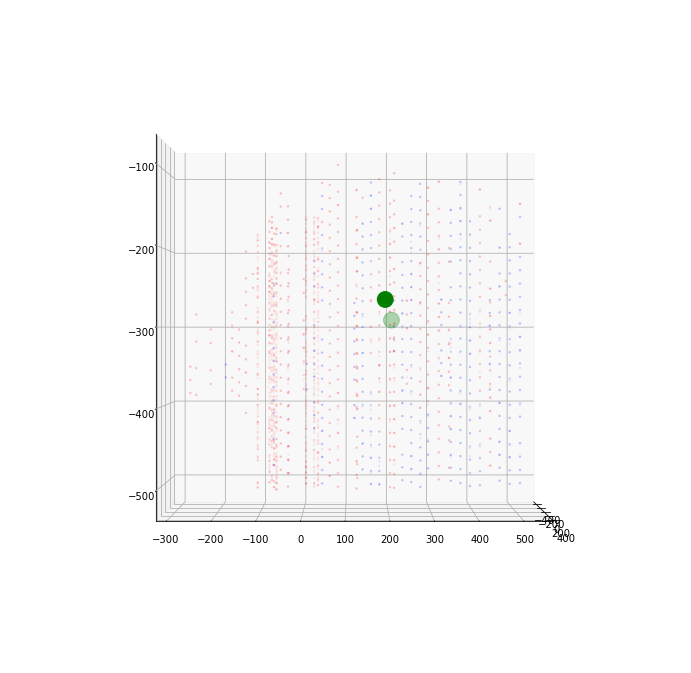

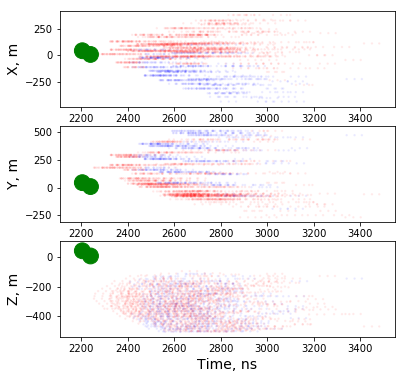

In [53]:
AC = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(centroids)
labels_57_Birch_AC = AC.labels_
new_col = np.full(labels_57_Birch_AC.shape, 10)
print new_col.shape, centroids.shape
data = np.column_stack((centroids, new_col))
make_plots(labels_57_Birch_AC,data,true_bangs[57])

[-1 -1 -1 ..., -1 -1 -1]
(3038,) (3038, 4)


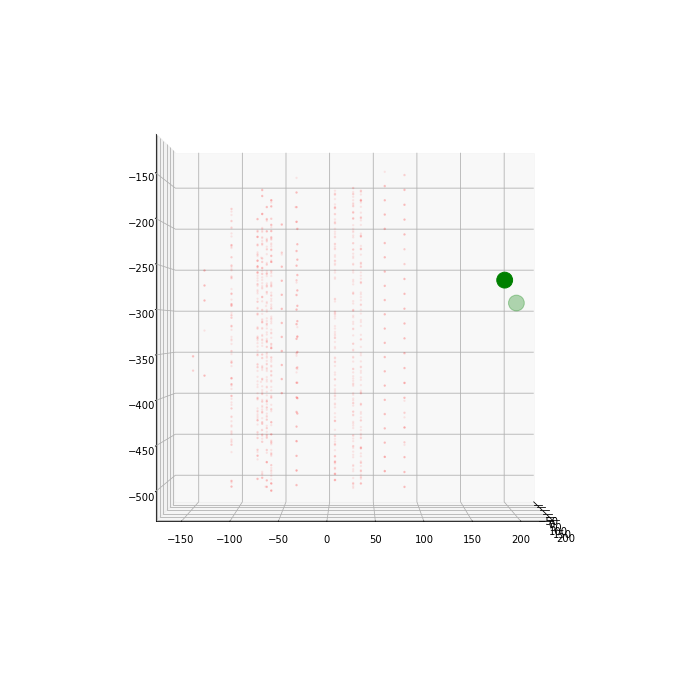

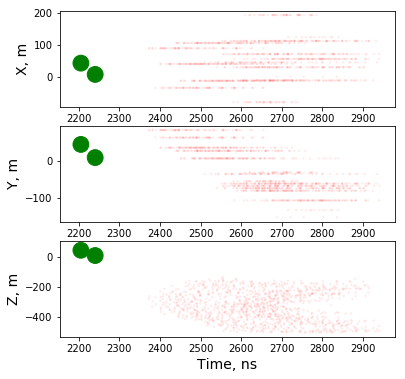

In [52]:
DBS = DBSCAN().fit(centroids)
labels_57_Birch_DBS = DBS.labels_
print labels_57_Birch_DBS
new_col = np.full(labels_57_Birch_DBS.shape, 10)
print new_col.shape, centroids.shape
data = np.column_stack((centroids, new_col))
make_plots(labels_57_Birch_DBS,data,true_bangs[57])

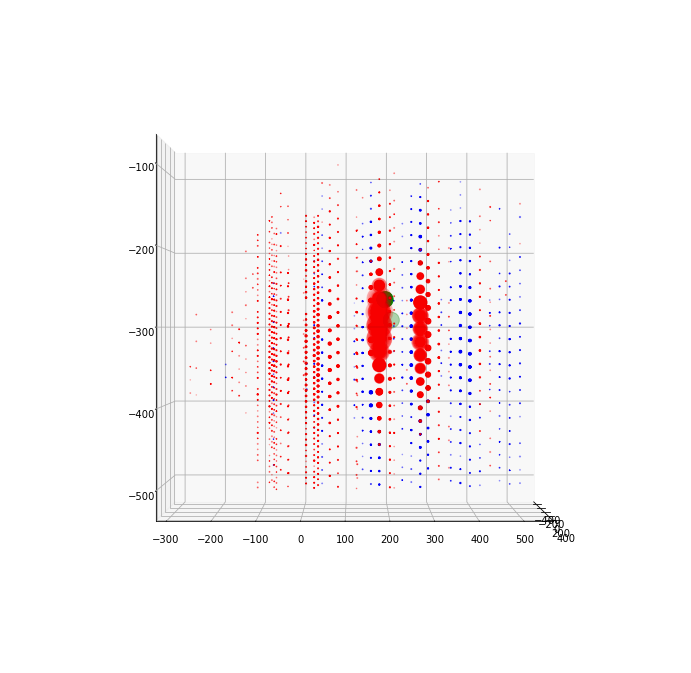

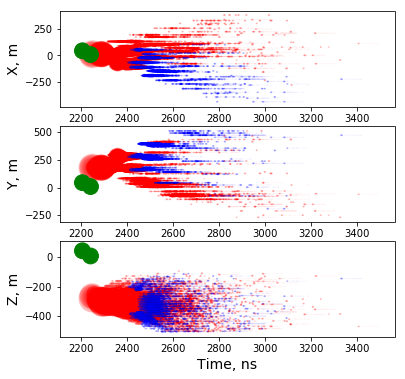

In [18]:
make_plots(labels_57_Birch,data_virg[57],true_bangs[57])

(131200,) (131200, 5) 11 1025


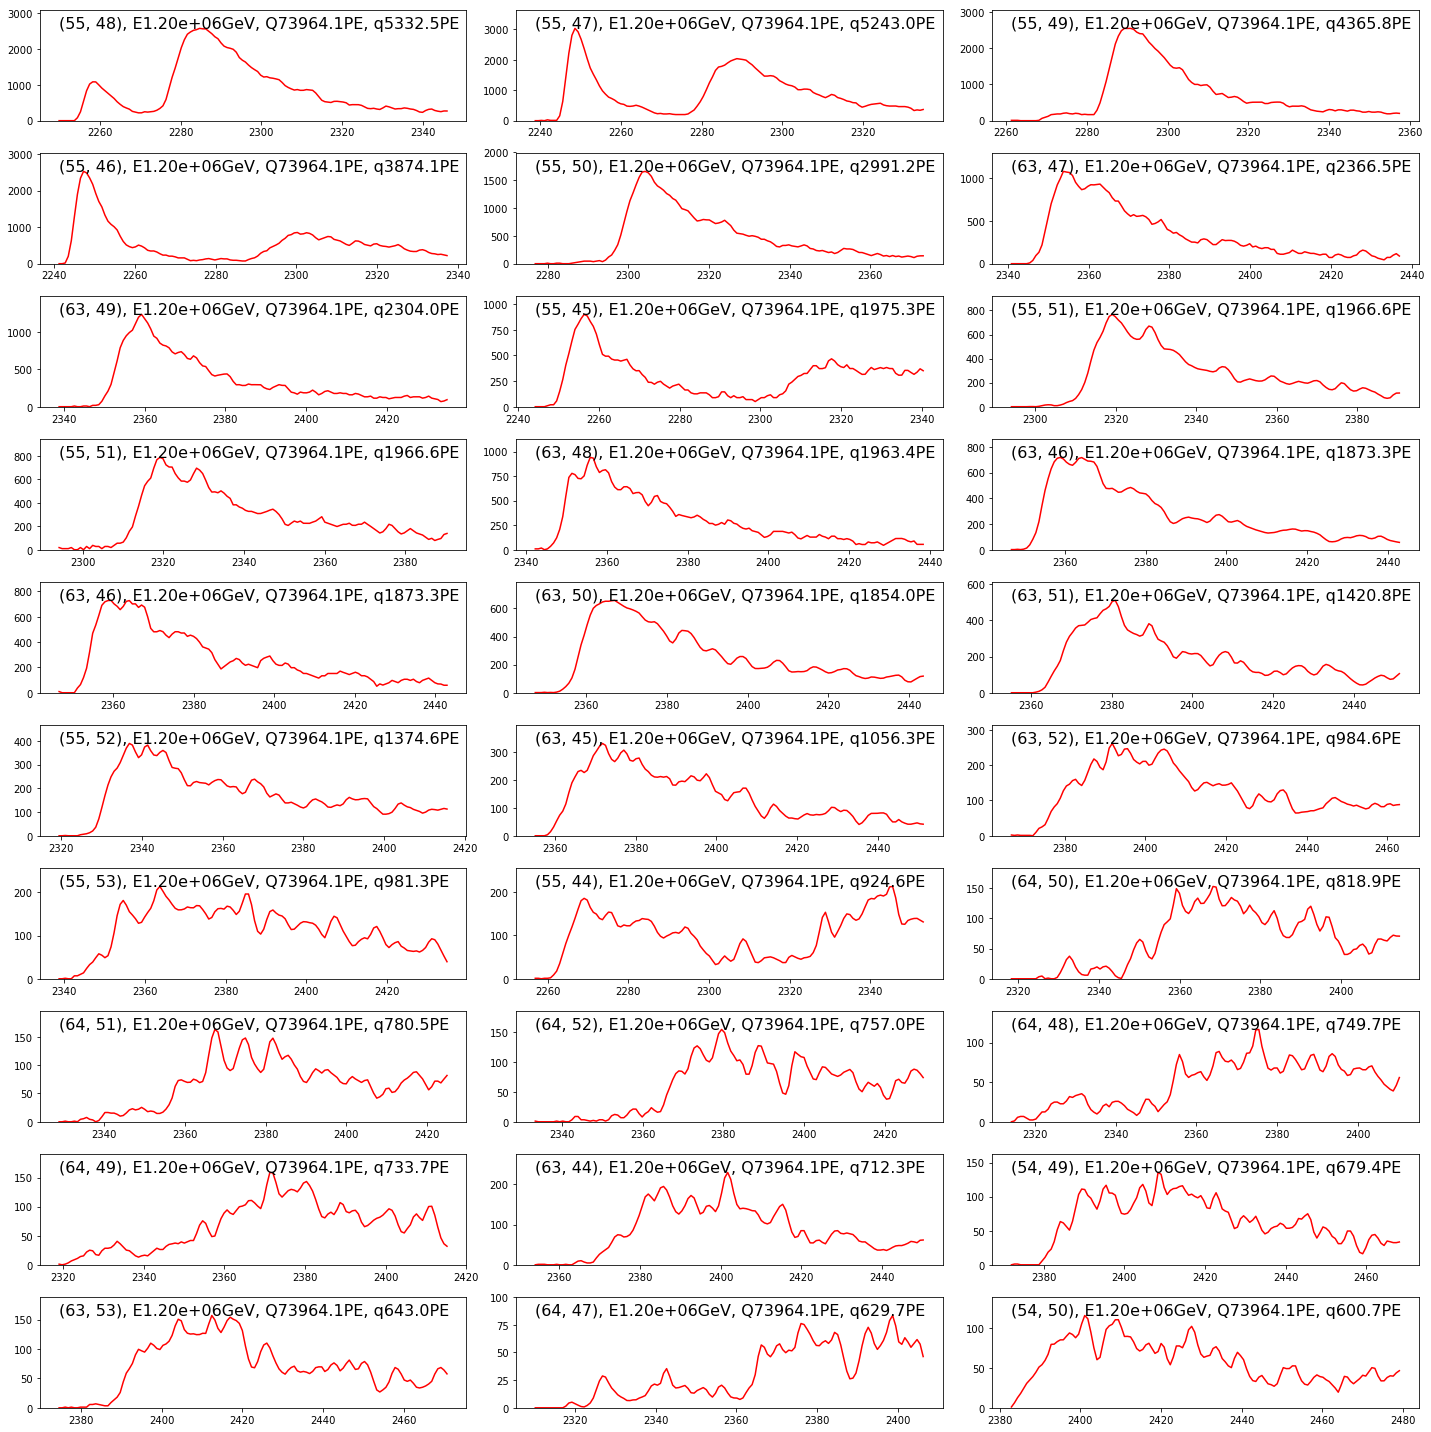

In [19]:
make_waveforms(labels_57_Birch,data_virg[57],info[57],info_virg[57])

In [19]:
make_movie(labels_57_Birch,data_virg[57],true_bangs[57])

/home/dup193/work/notebook/movie/pic_times_0000.png
/home/dup193/work/notebook/movie/pic_times_0001.png
/home/dup193/work/notebook/movie/pic_times_0002.png
/home/dup193/work/notebook/movie/pic_times_0003.png
/home/dup193/work/notebook/movie/pic_times_0004.png
/home/dup193/work/notebook/movie/pic_times_0005.png
/home/dup193/work/notebook/movie/pic_times_0006.png
/home/dup193/work/notebook/movie/pic_times_0007.png
/home/dup193/work/notebook/movie/pic_times_0008.png
/home/dup193/work/notebook/movie/pic_times_0009.png
/home/dup193/work/notebook/movie/pic_times_0010.png
/home/dup193/work/notebook/movie/pic_times_0011.png
/home/dup193/work/notebook/movie/pic_times_0012.png
/home/dup193/work/notebook/movie/pic_times_0013.png
/home/dup193/work/notebook/movie/pic_times_0014.png
/home/dup193/work/notebook/movie/pic_times_0015.png
/home/dup193/work/notebook/movie/pic_times_0016.png
/home/dup193/work/notebook/movie/pic_times_0017.png
/home/dup193/work/notebook/movie/pic_times_0018.png
/home/dup193

In [108]:
labels_126_Birch = Birch(n_clusters=2, threshold = 10, branching_factor = 50).fit_predict(data_virg[126][:,0:4],data_virg[126][:,4])
unique, counts = np.unique(labels_126_Birch, return_counts=True)
print dict(zip(unique, counts))

{0: 17238, 1: 17706}


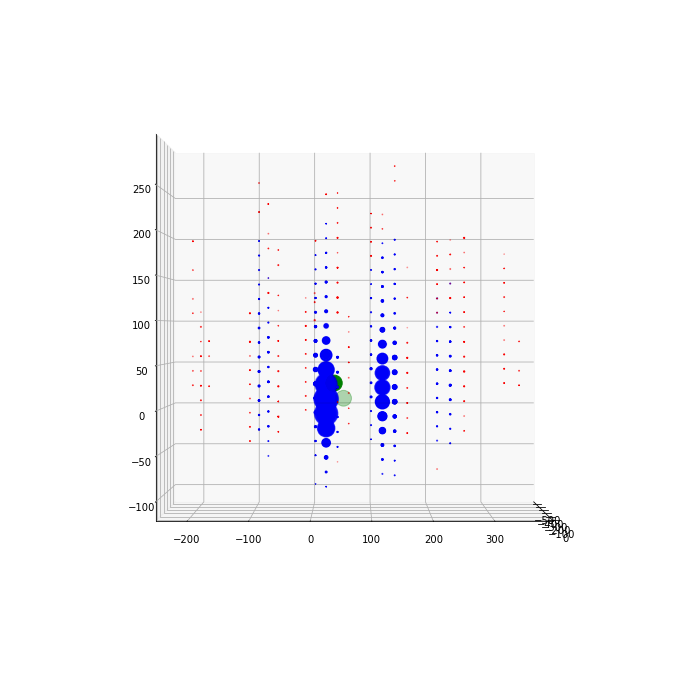

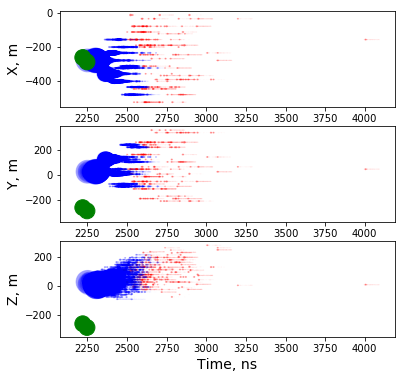

In [109]:
make_plots(labels_126_Birch,data_virg[126],true_bangs[126])

(34944,) (34944, 5) 11 273


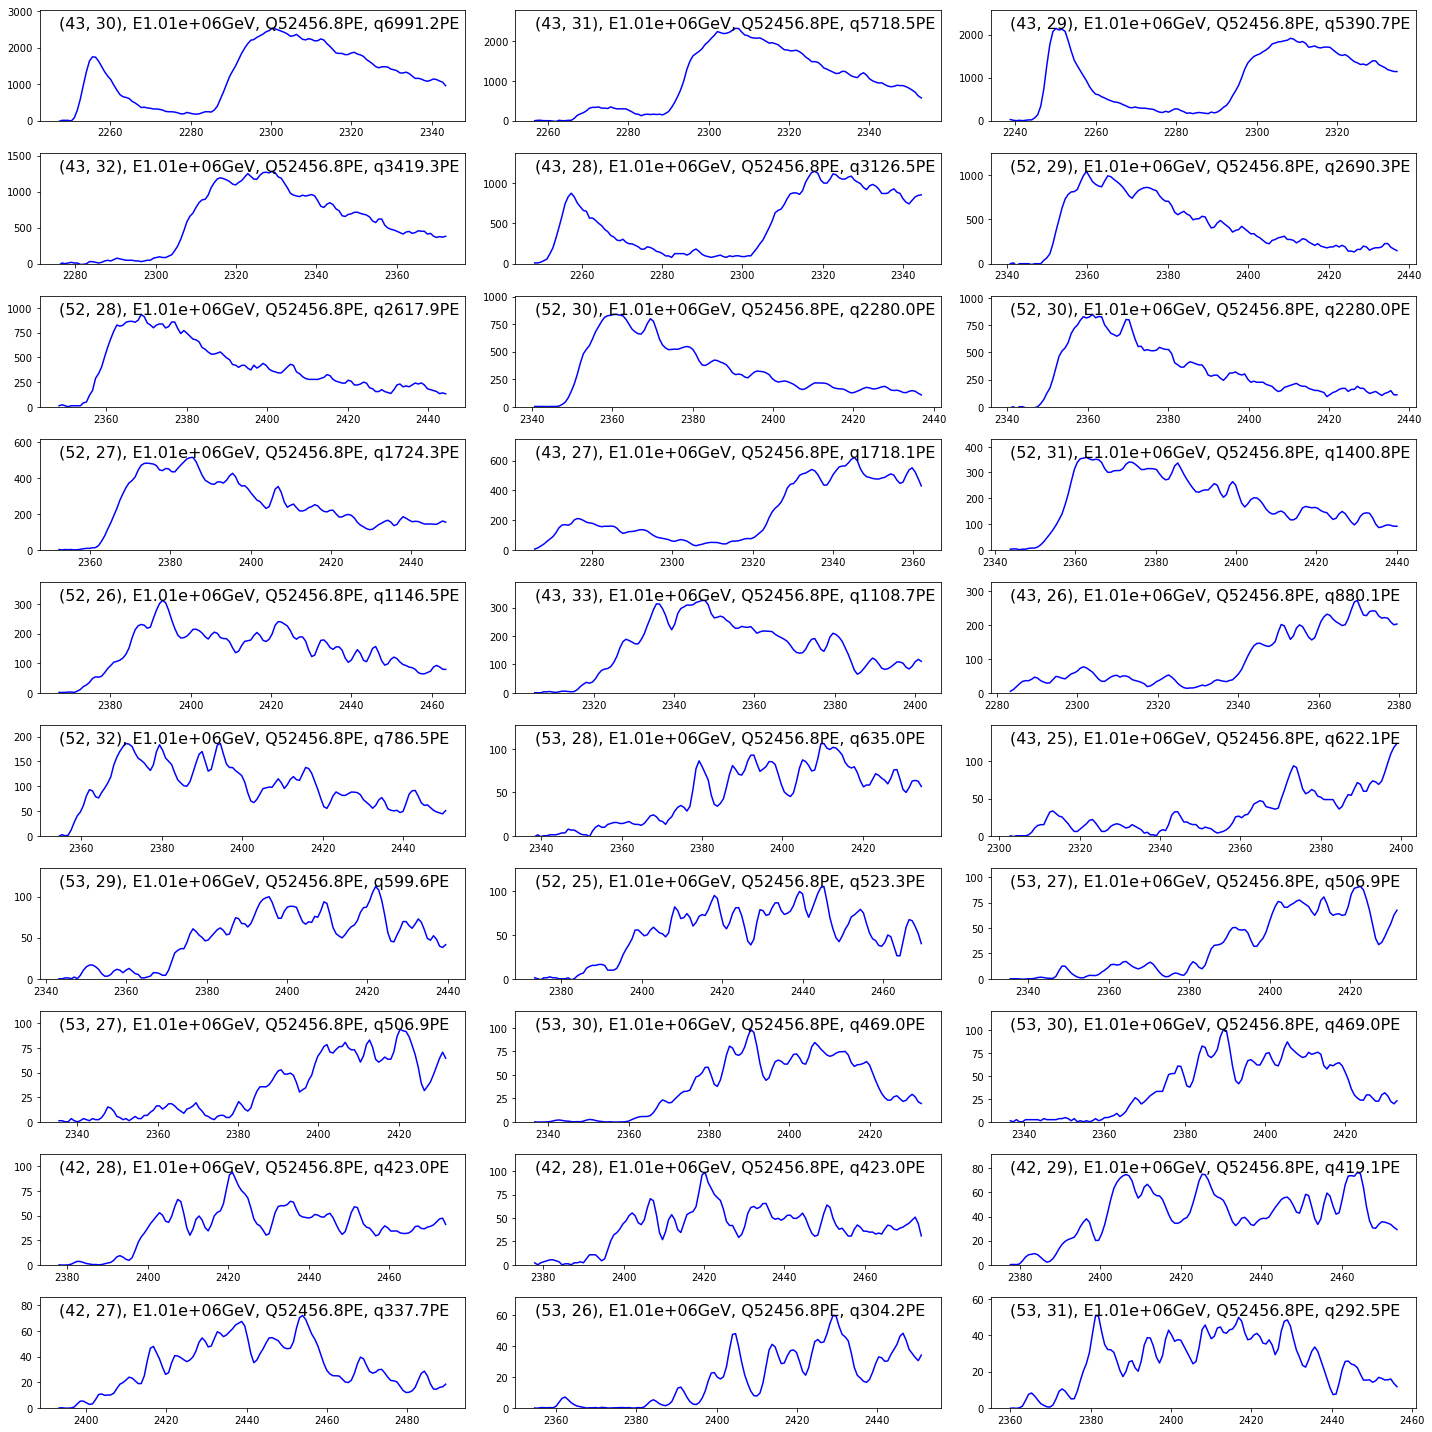

In [110]:
make_waveforms(labels_126_Birch,data_virg[126],info[126],info_virg[126])

In [ ]:
labels_57_AGC = AgglomerativeClustering(n_clusters=2).fit_predict(data_virg[57][:,0:4],data_virg[57][:,4])
print labels_57_AGC
print len(labels_57_AGC==1),len(labels_57_AGC==0)

In [ ]:
make_plots(labels_57_AGC,data_virg[57],true_bangs[57])

In [16]:
GMM = GaussianMixture(n_components=2).fit(data_virg[57][:,0:4])
labels_57_GM = GMM.predict(data_virg[57][:,0:4])
unique, counts = np.unique(labels_57_GM, return_counts=True)
print dict(zip(unique, counts))

{0: 60049, 1: 71151}


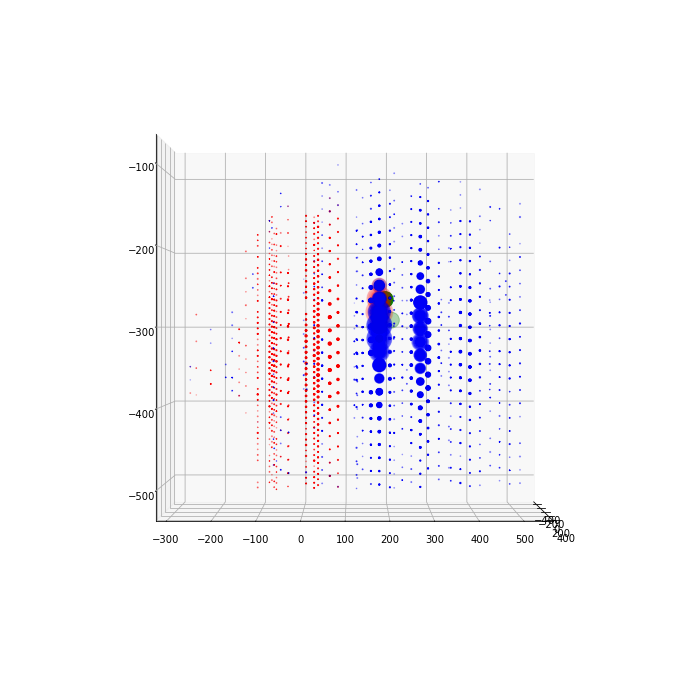

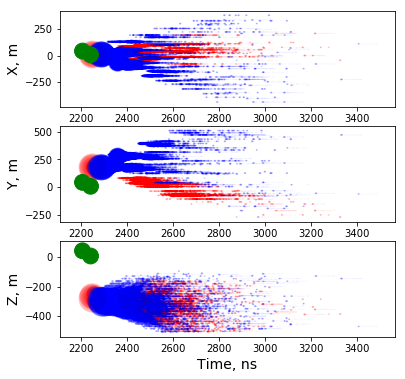

In [17]:
make_plots(labels_57_GM,data_virg[57],true_bangs[57])

(131200,) (131200, 5) 11 1025


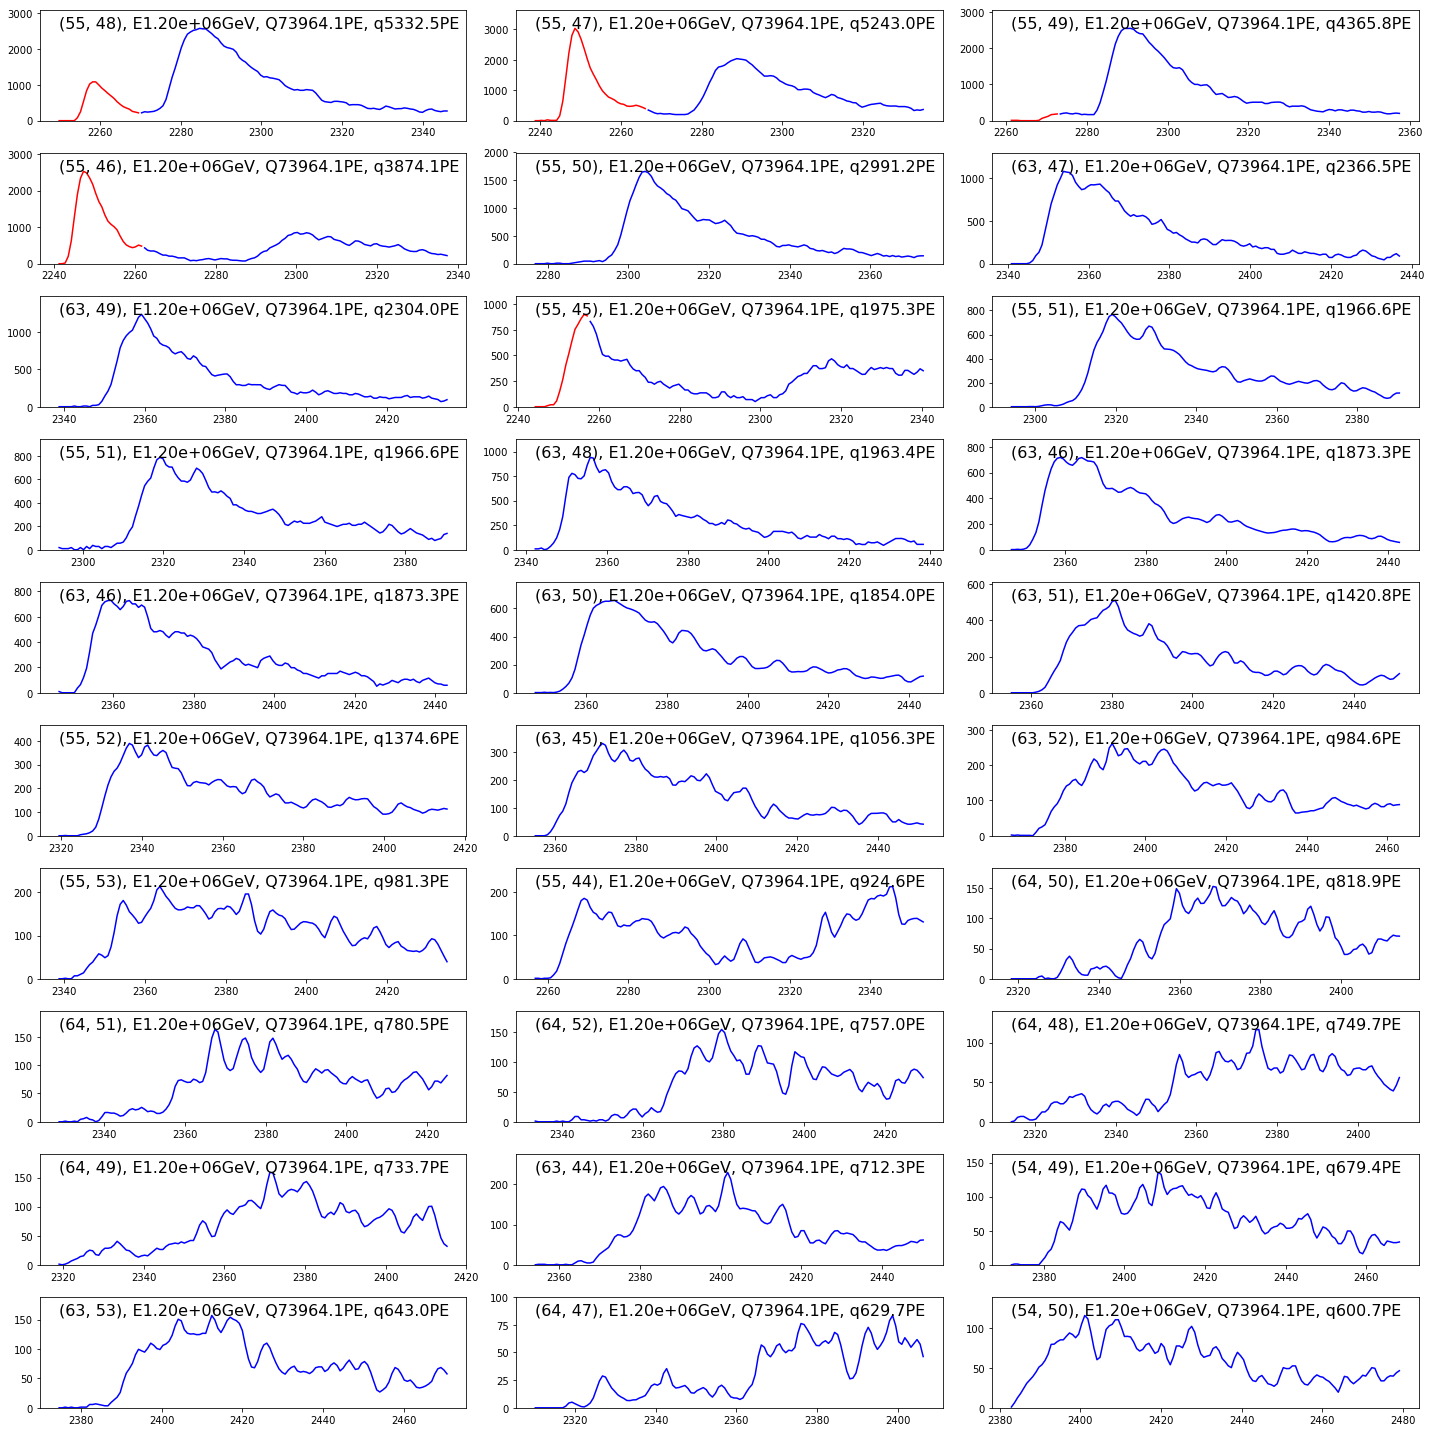

In [18]:
make_waveforms(labels_57_GM,data_virg[57],info[57],info_virg[57])

TypeError: text() takes at least 5 arguments (2 given)

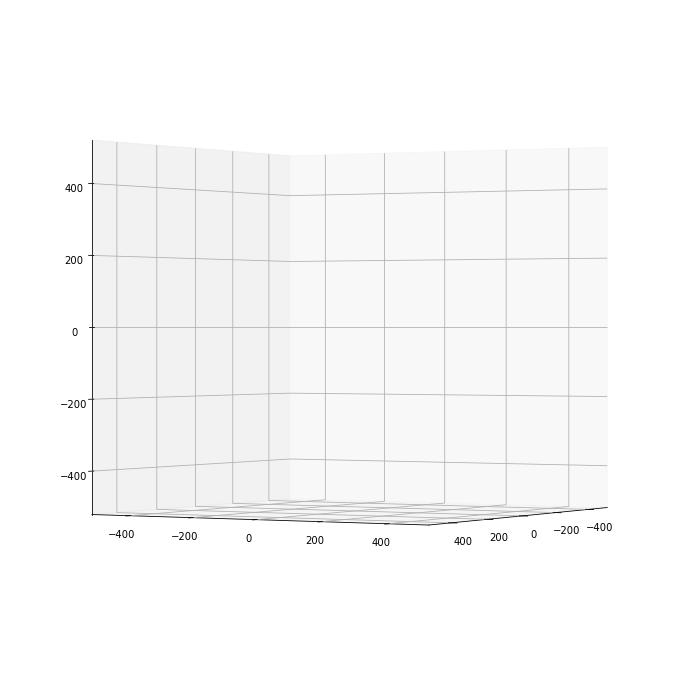

In [21]:
make_movie(labels_57_GM,data_virg[57],true_bangs[57])

In [99]:
GMM2 = GaussianMixture(n_components=2).fit(data_virg[126][:,0:4])
labels_126_GM = GMM2.predict(data_virg[126][:,0:4])
probs_126_GM = GMM2.predict_proba(data_virg[126][:,0:4])
# labels_126_GM = []
# for i in probs_126_GM:
#     if i[0] >0.2:
#         labels_126_GM.append(1)
#     else:
#         labels_126_GM.append(0)
# labels_126_GM =np.array(labels_126_GM)
print labels_126_GM.shape
unique, counts = np.unique(labels_126_GM, return_counts=True)
print dict(zip(unique, counts))

(34944,)
{0: 16250, 1: 18694}


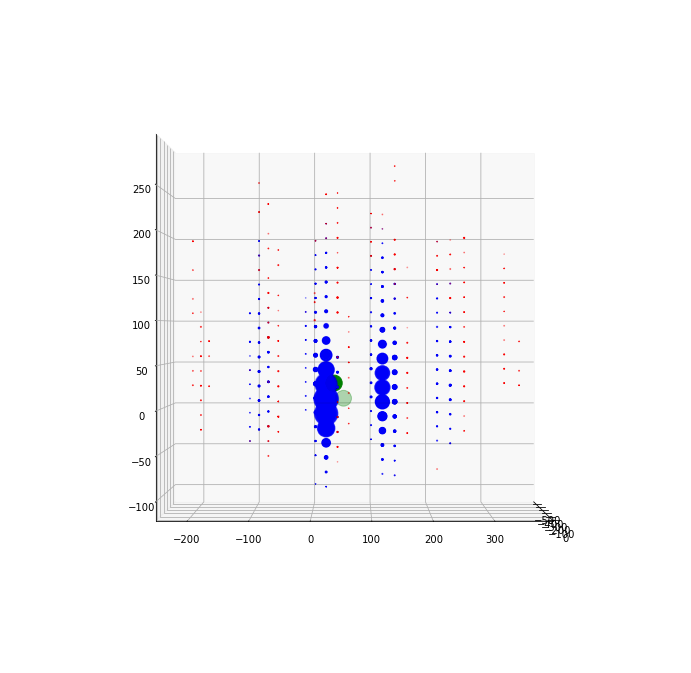

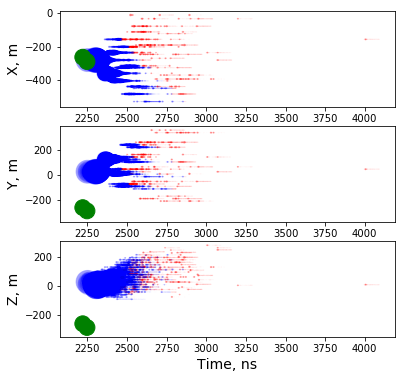

In [100]:
make_plots(labels_126_GM,data_virg[126],true_bangs[126])

(34944,) (34944, 5) 11 273


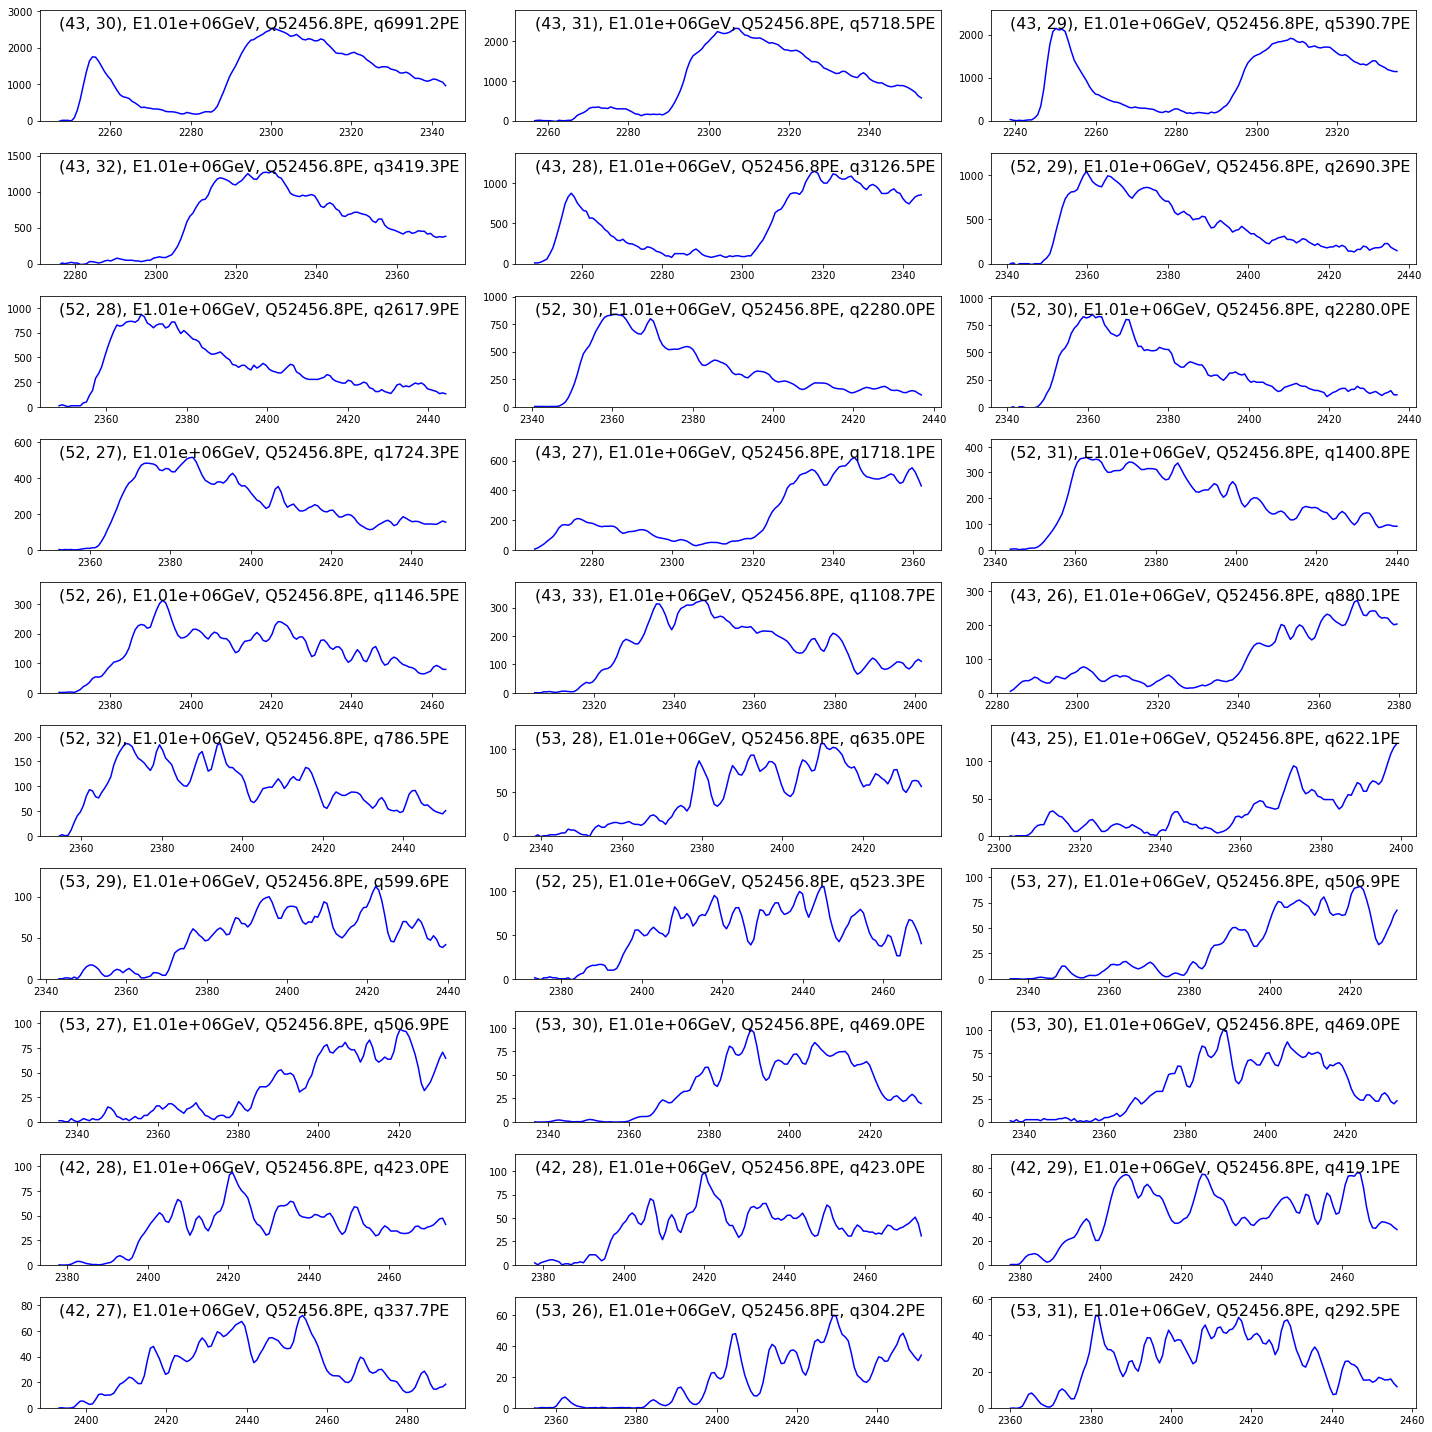

In [101]:
make_waveforms(labels_126_GM,data_virg[126],info[126],info_virg[126])

In [48]:
GM_data_57 = []
GM_label_crsp_57 = []
print np.max(data_virg[57][:,4]),np.min(data_virg[57][:,4])
for i, sample in enumerate(data_virg[57]):
    if not sample[4]<0: 
        for j in range(0,int(sample[4]//5)):
            GM_data_57.append(sample)
            GM_label_crsp_57.append(i)
GM_data_57 = np.vstack(GM_data_57)
GM_label_crsp_57 = np.array(GM_label_crsp_57)

print GM_data_57,  len(GM_data_57)
print GM_label_crsp_57, len(GM_label_crsp_57)

3029.93961356 -28.6708410604
[[   79.41000366  -248.24000549  -318.08999634  2990.60705476     6.2974348 ]
 [  210.47000122  -209.77000427  -354.08999634  3215.44664842
      6.36088451]
 [  210.47000122  -209.77000427  -354.08999634  3216.20379316
      5.72192225]
 ..., 
 [  -10.97000027     6.71999979  -500.73001099  2642.48947324
      5.60992471]
 [  -10.97000027     6.71999979  -500.73001099  2643.24648007
      5.60598567]
 [  -10.97000027     6.71999979  -500.73001099  2693.9659373      5.17976357]] 230125
[   526   1157   1158 ..., 131081 131082 131149] 230125


In [50]:
GMM2_W = GaussianMixture(n_components=2,init_params ="random").fit(GM_data_57[:,0:4])
labels_57_GM_W = GMM2_W.predict(GM_data_57[:,0:4])
unique, counts = np.unique(labels_57_GM_W, return_counts=True)
print dict(zip(unique, counts))

{0: 43033, 1: 187092}


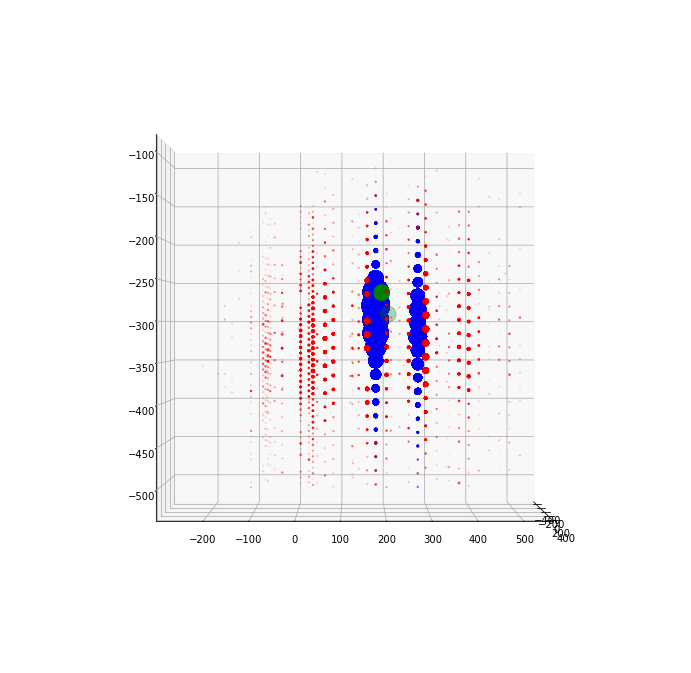

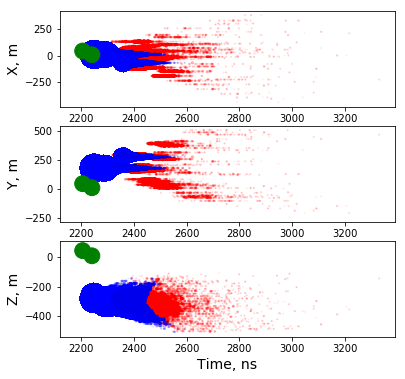

In [57]:
make_plots(labels_57_GM_W,GM_data_57,true_bangs[57])

/home/dup193/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


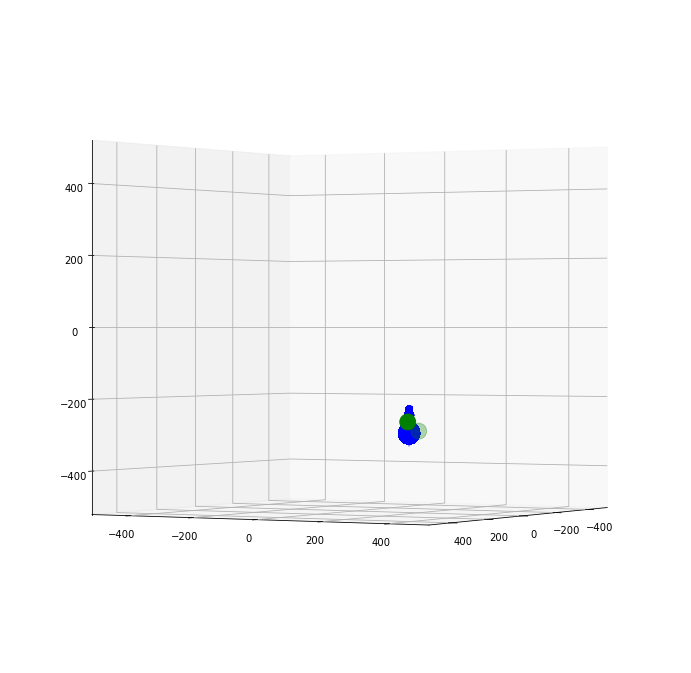

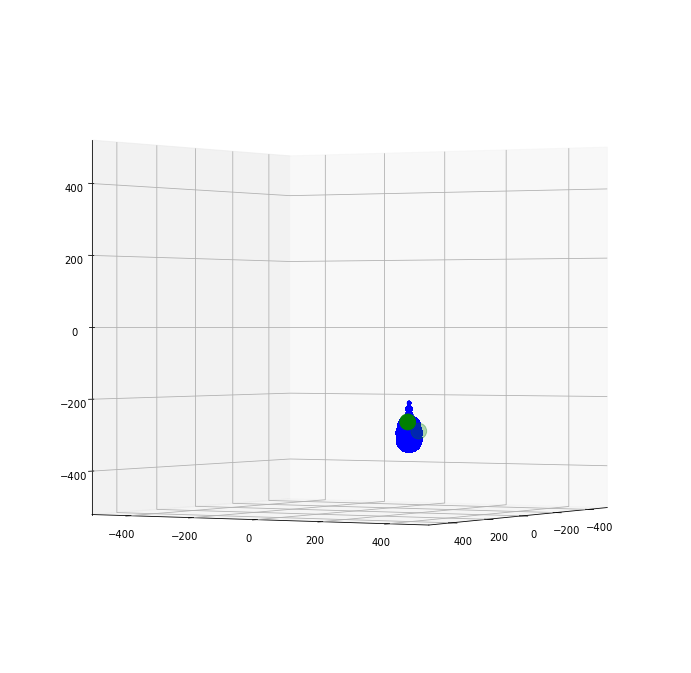

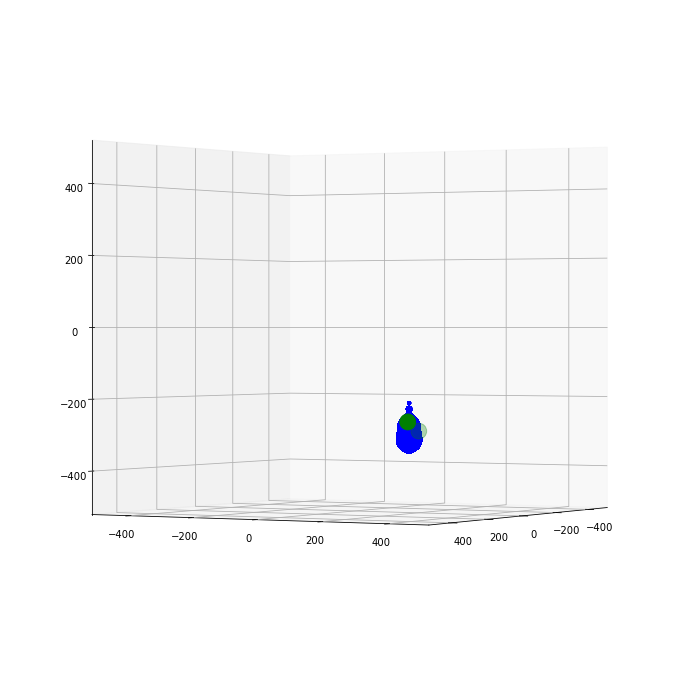

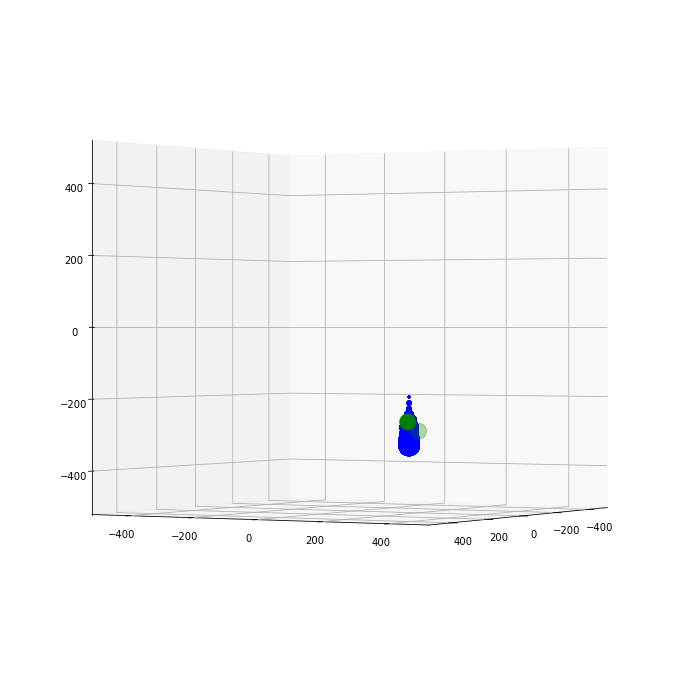

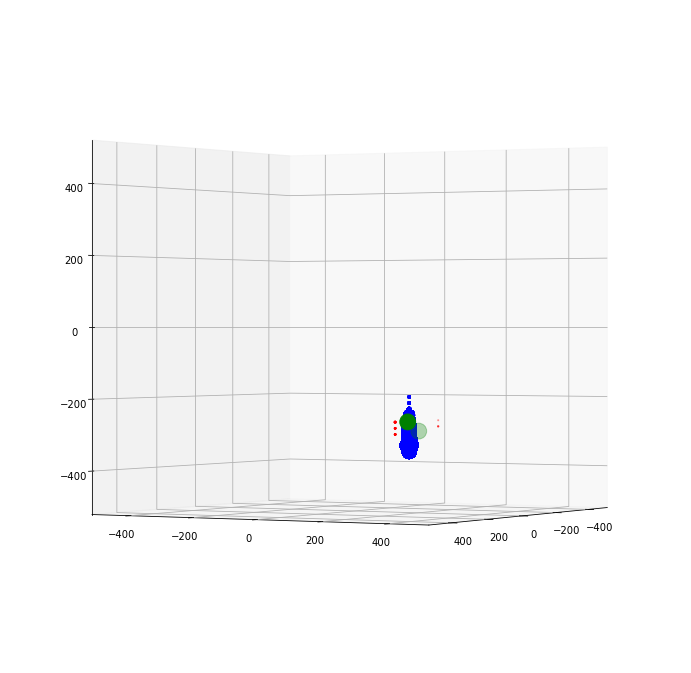

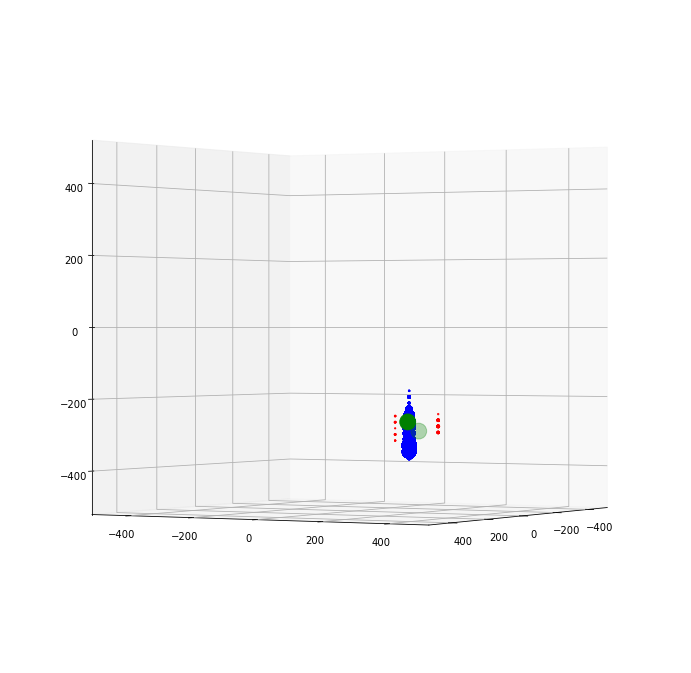

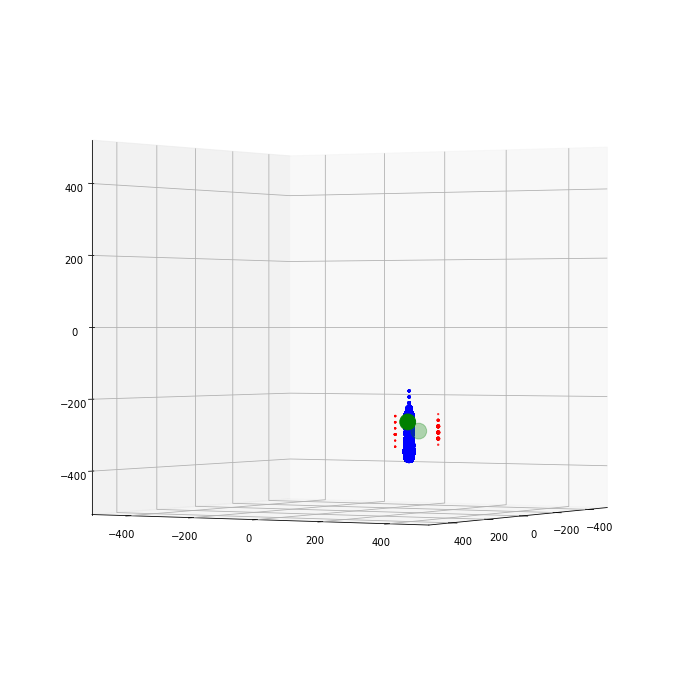

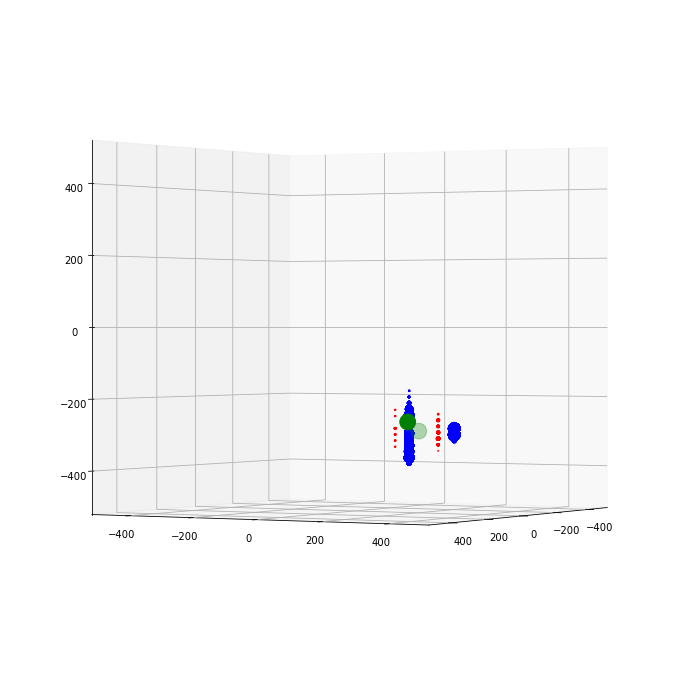

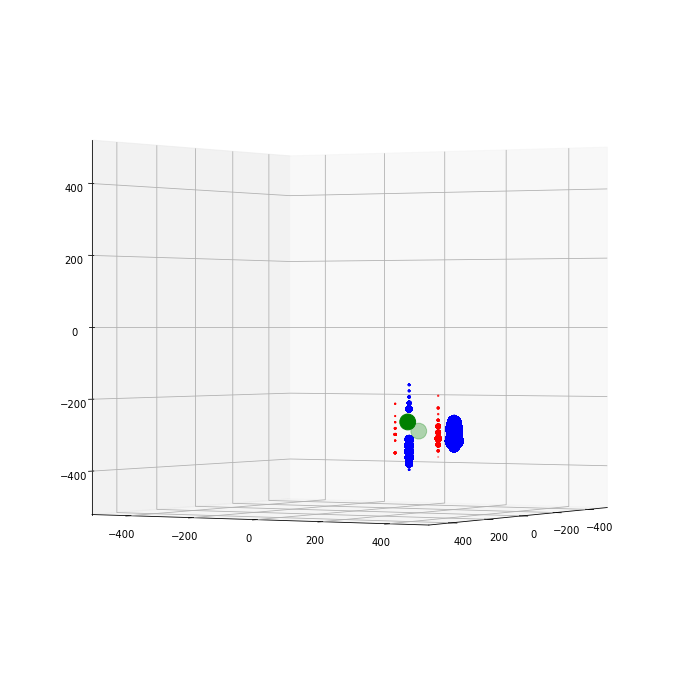

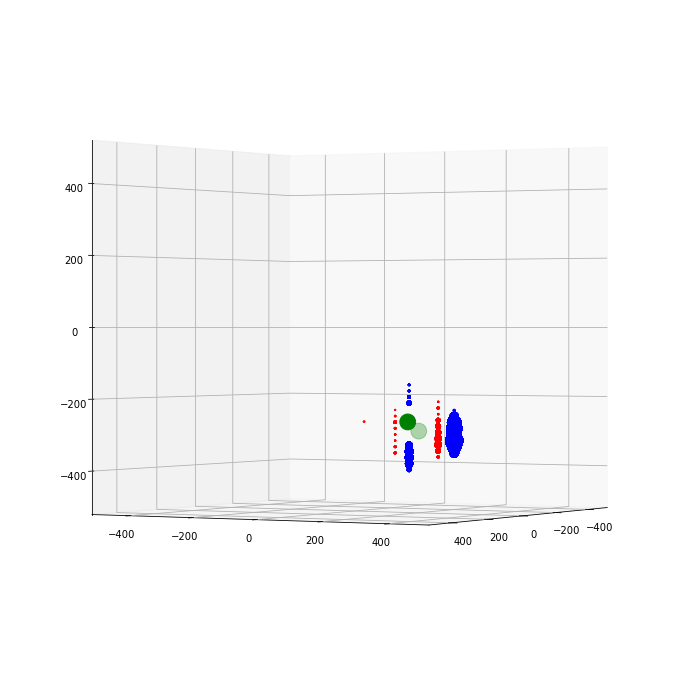

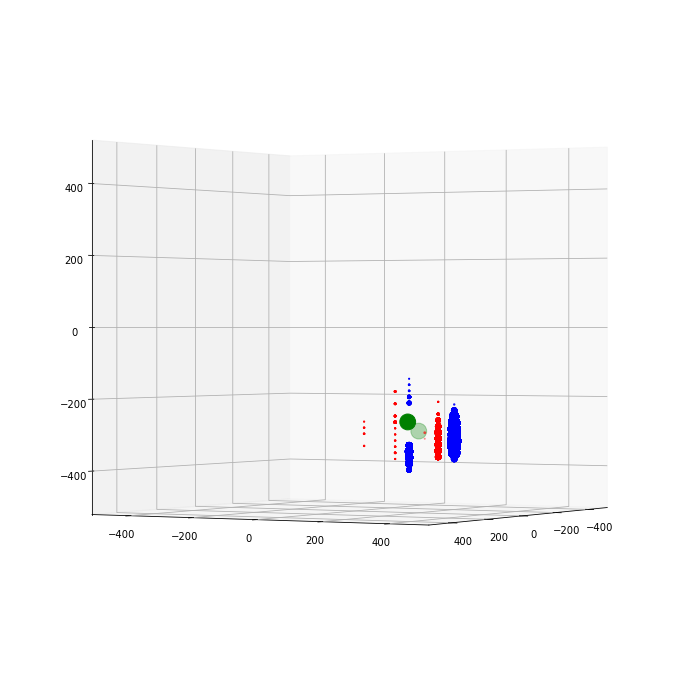

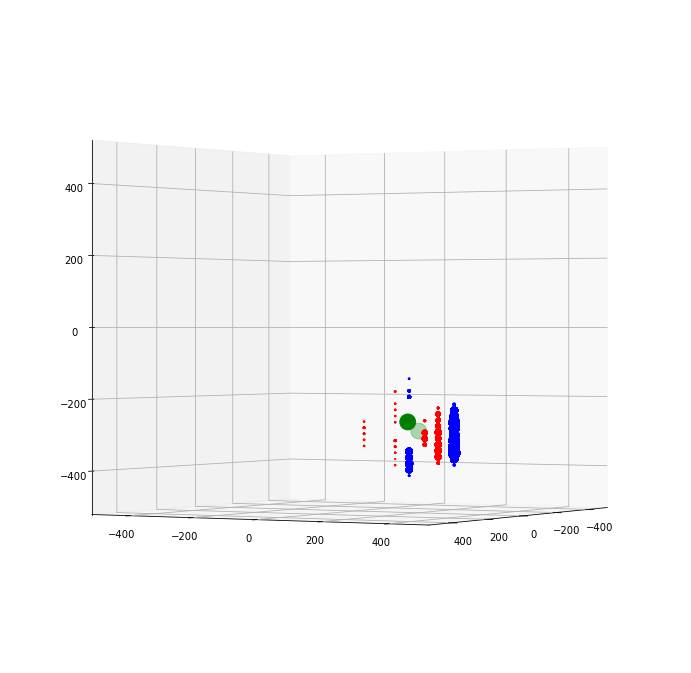

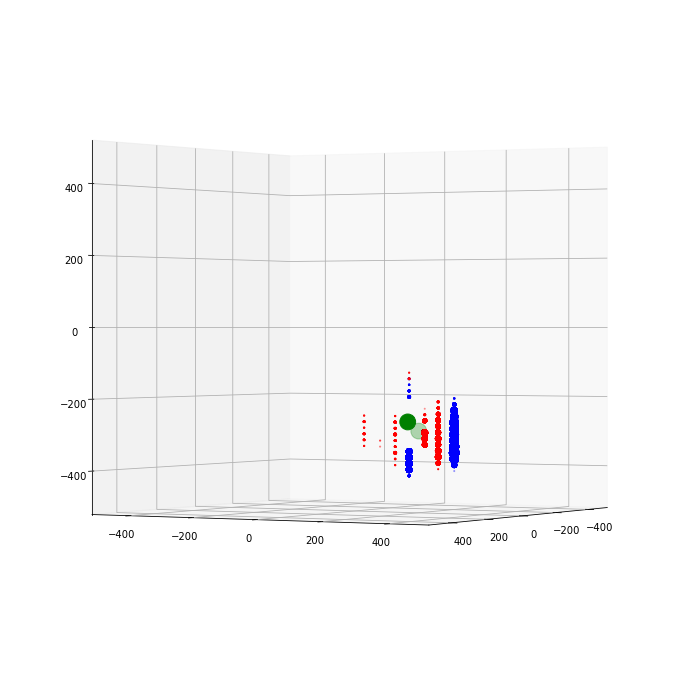

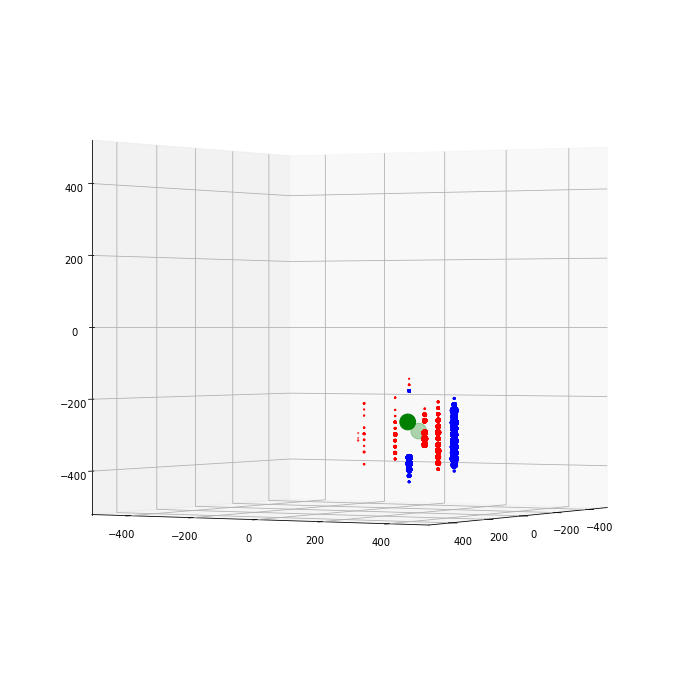

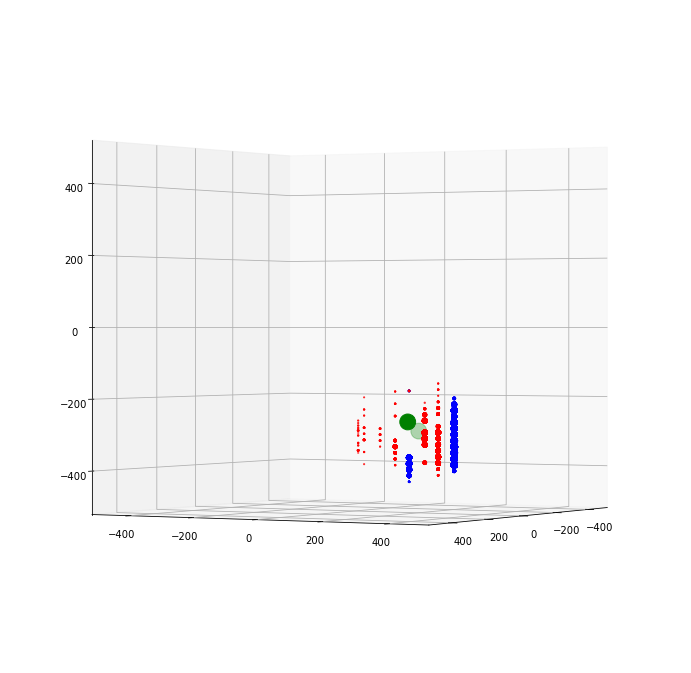

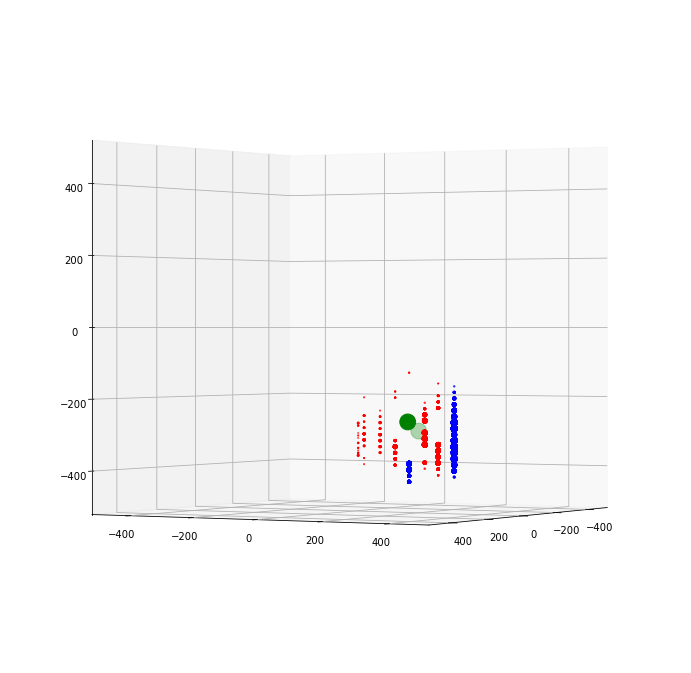

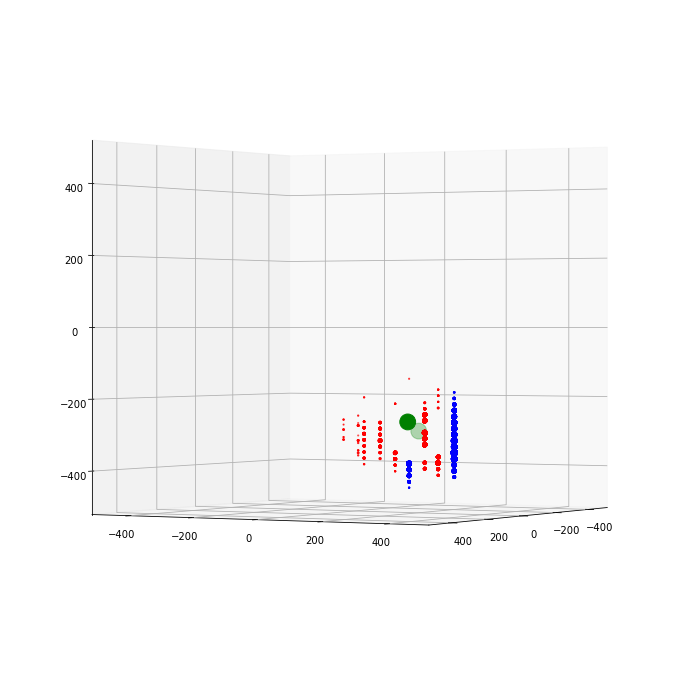

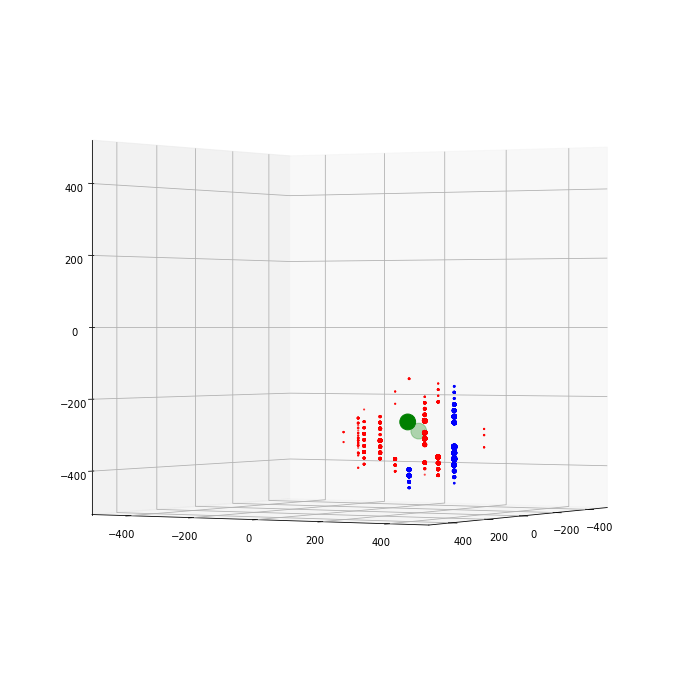

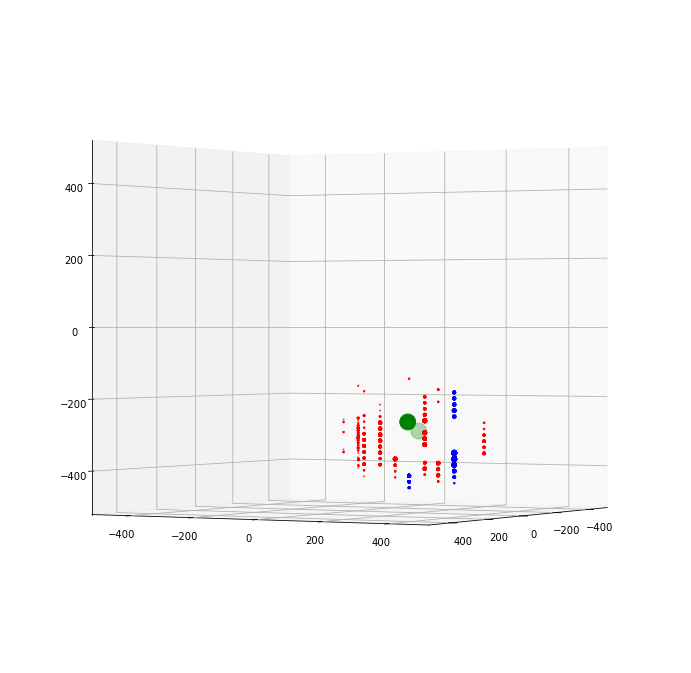

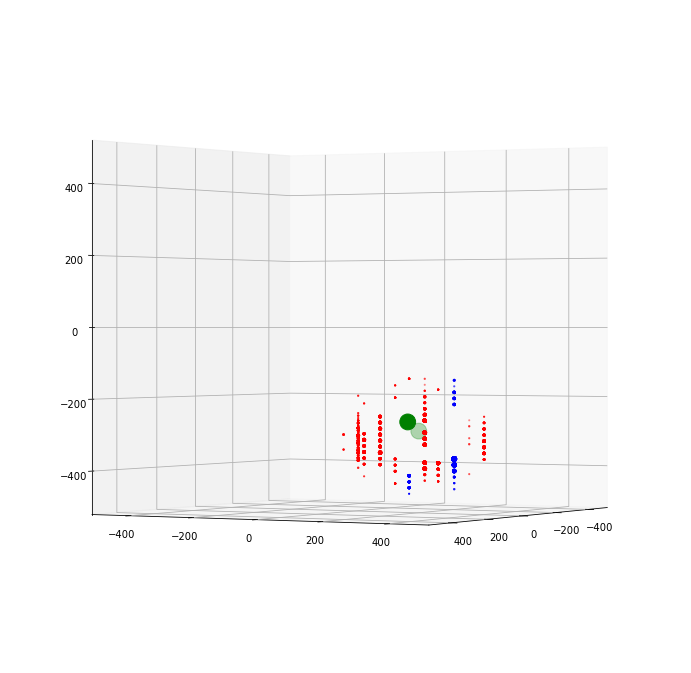

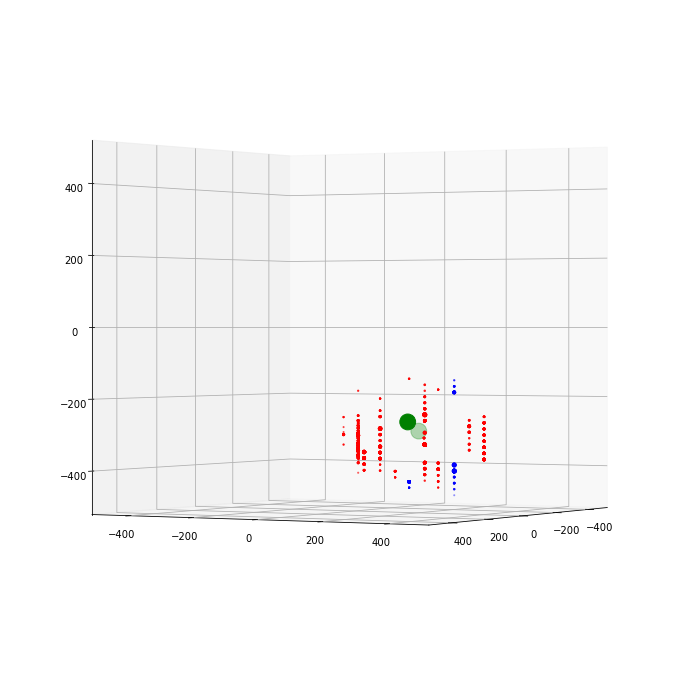

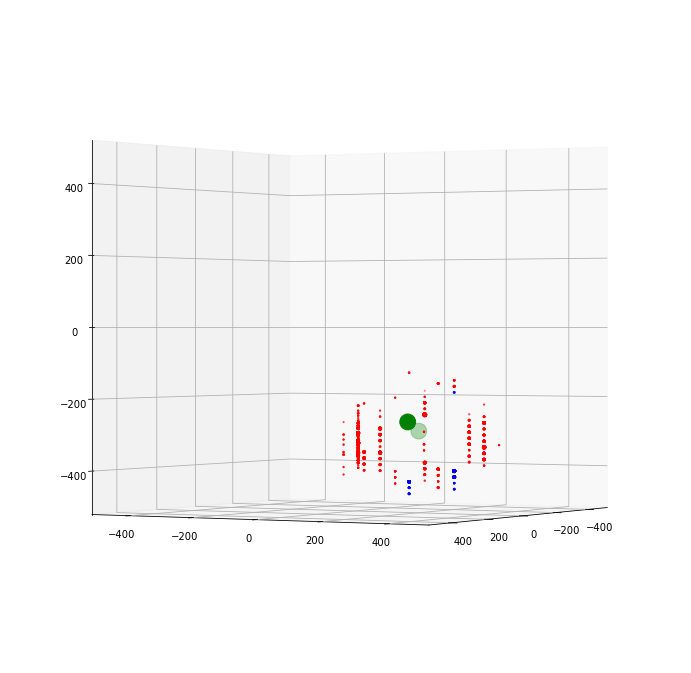

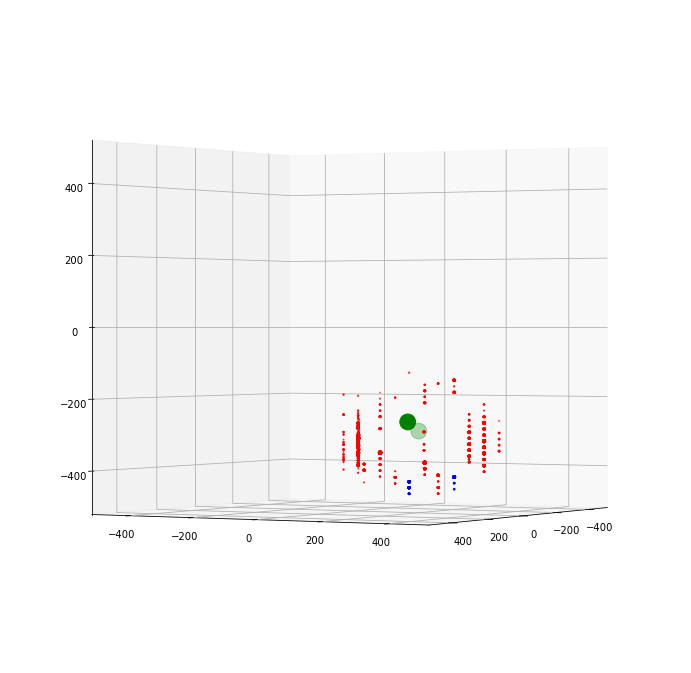

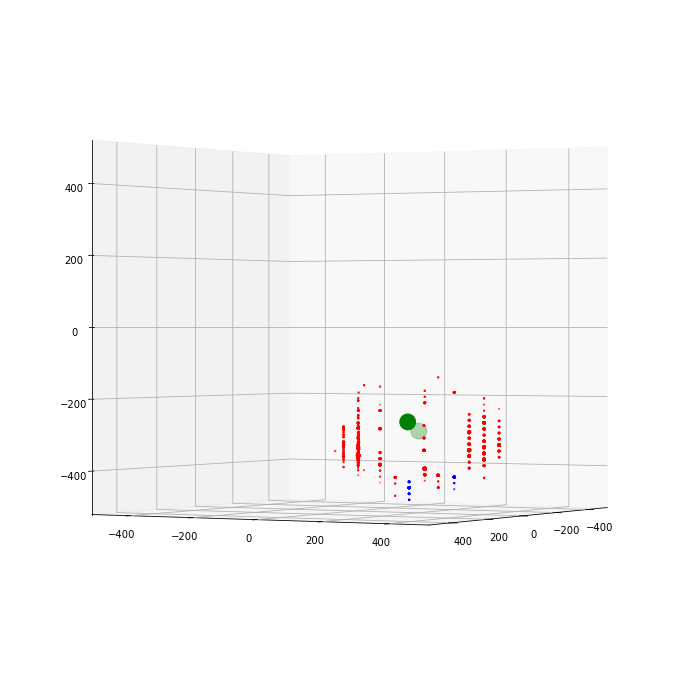

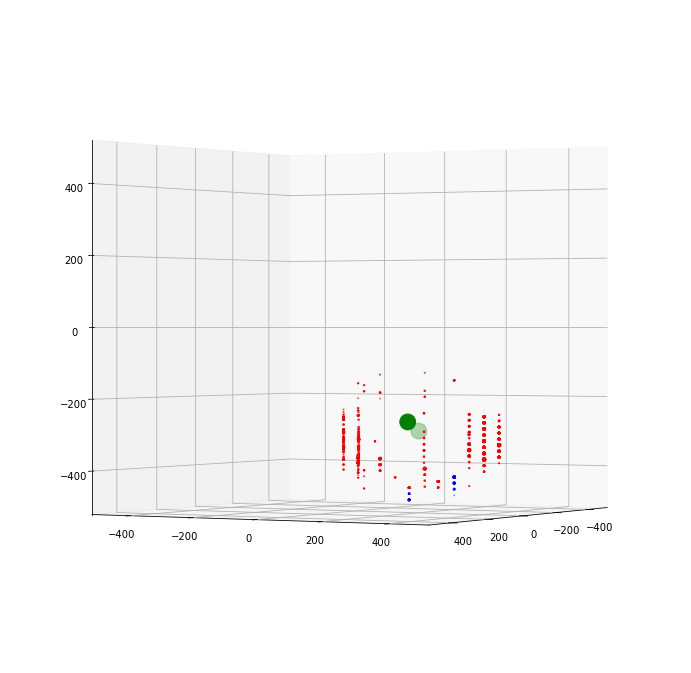

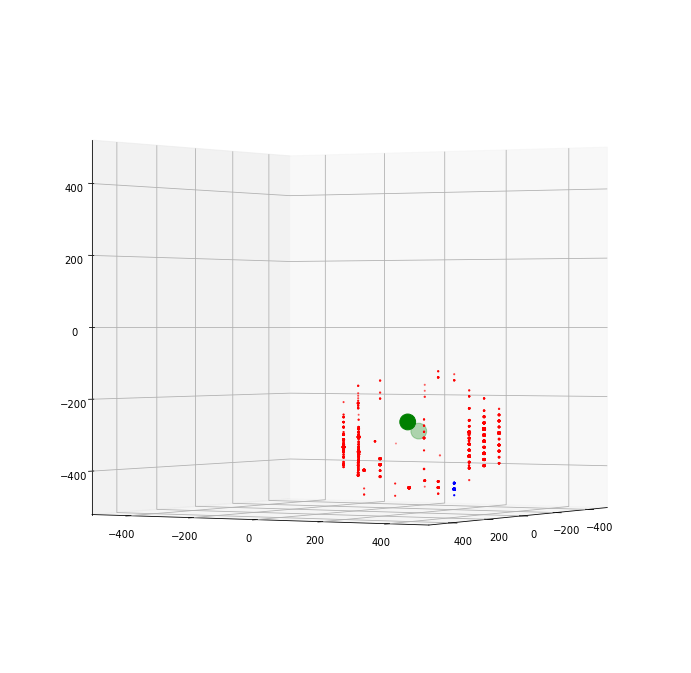

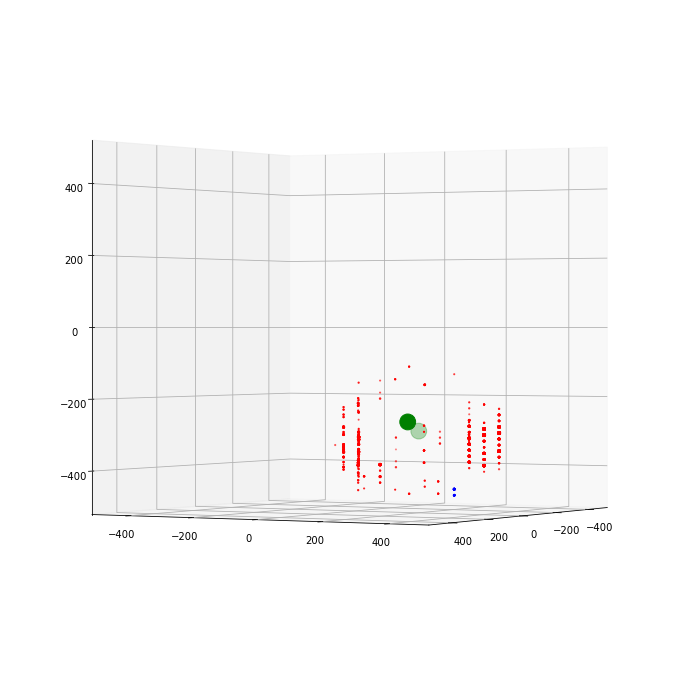

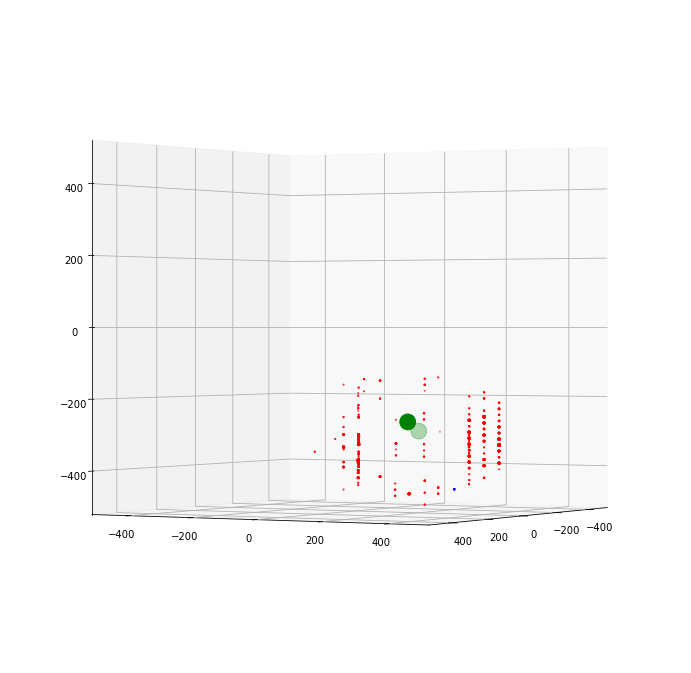

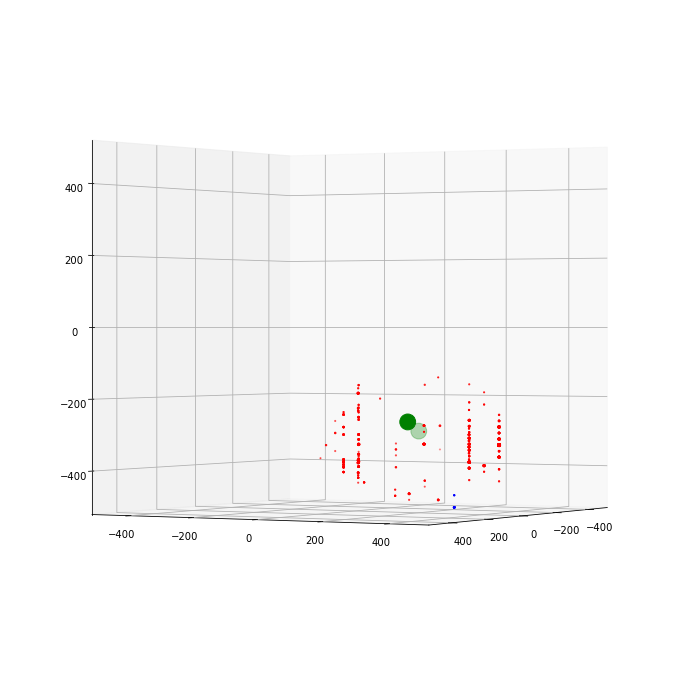

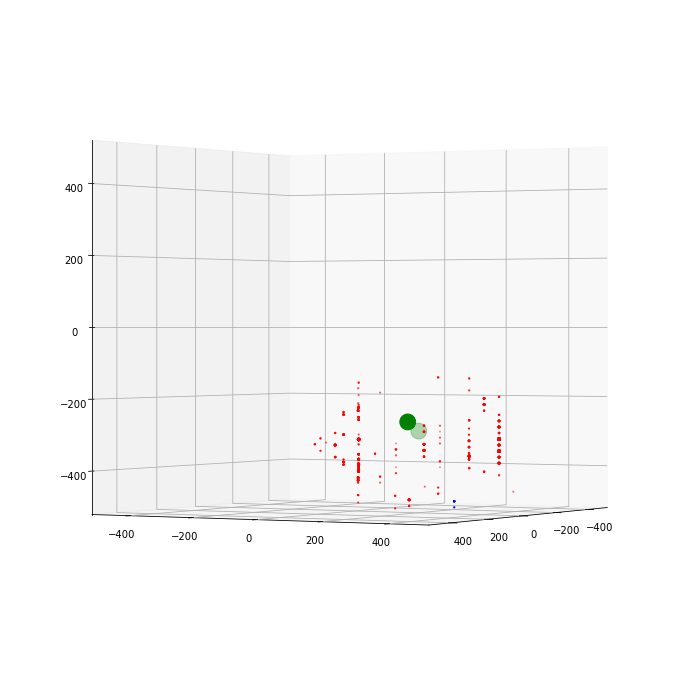

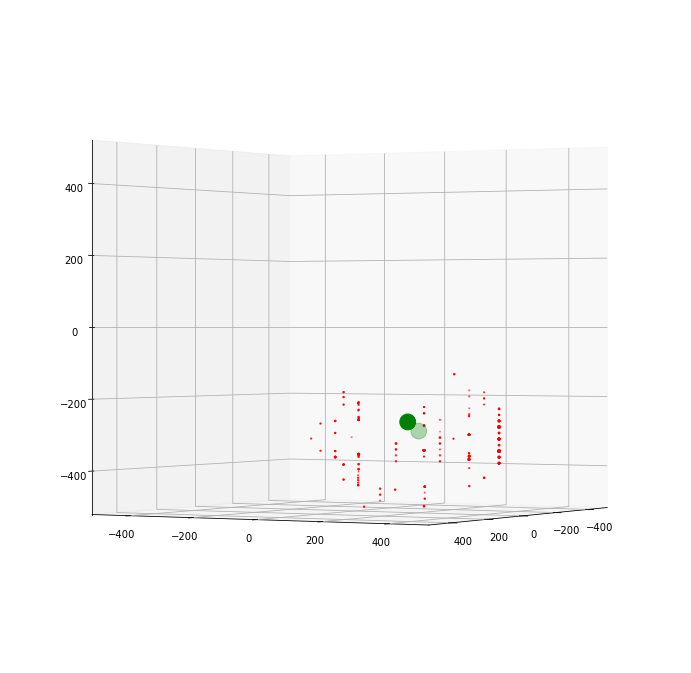

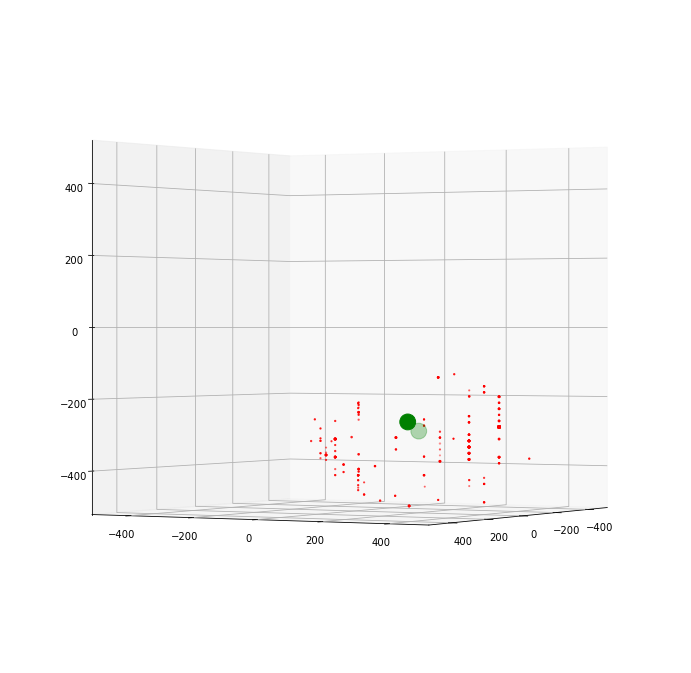

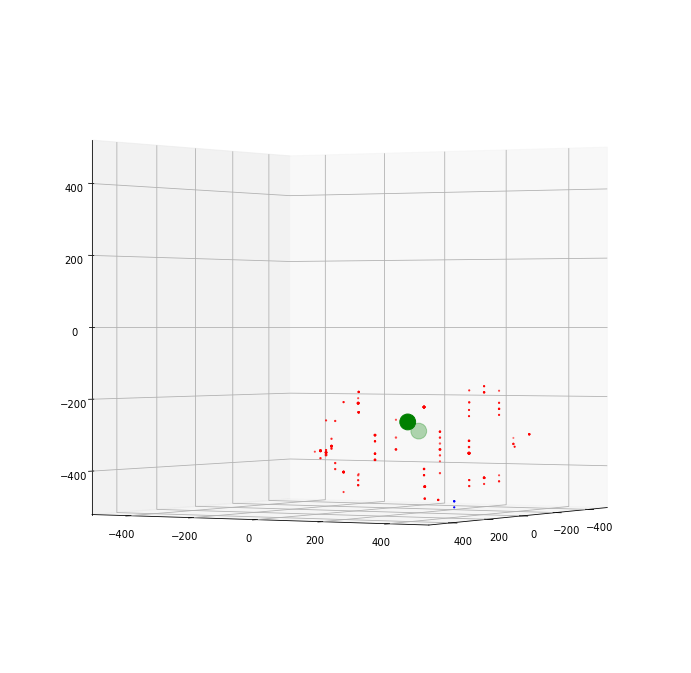

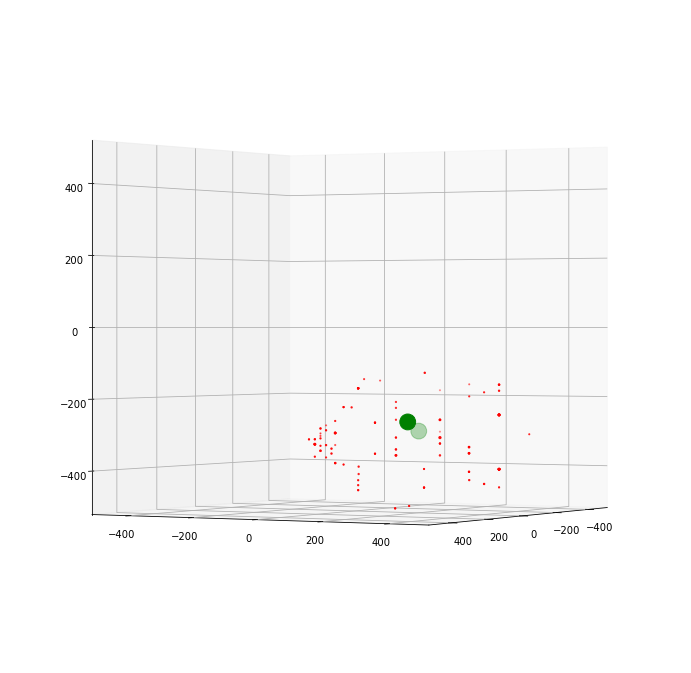

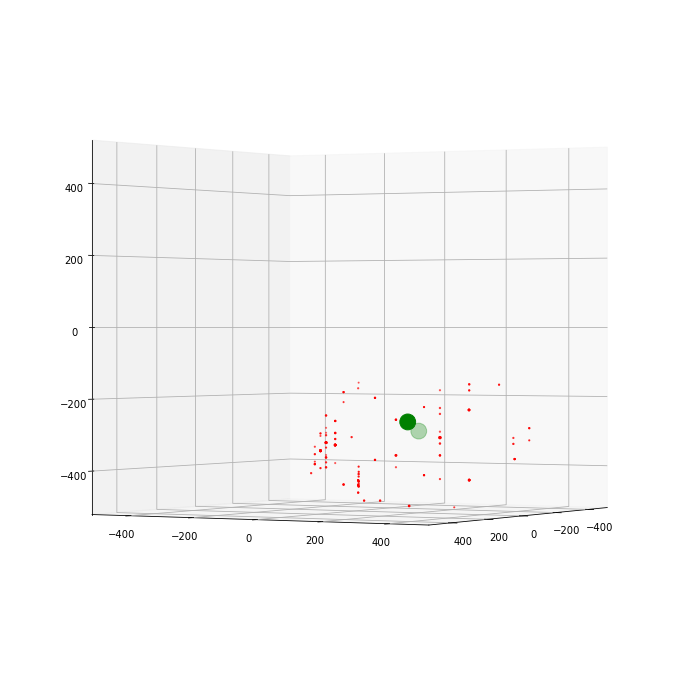

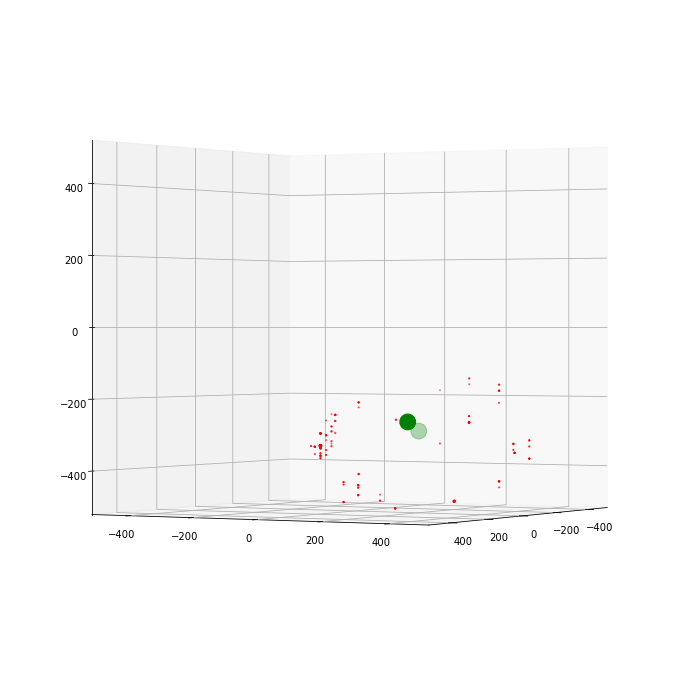

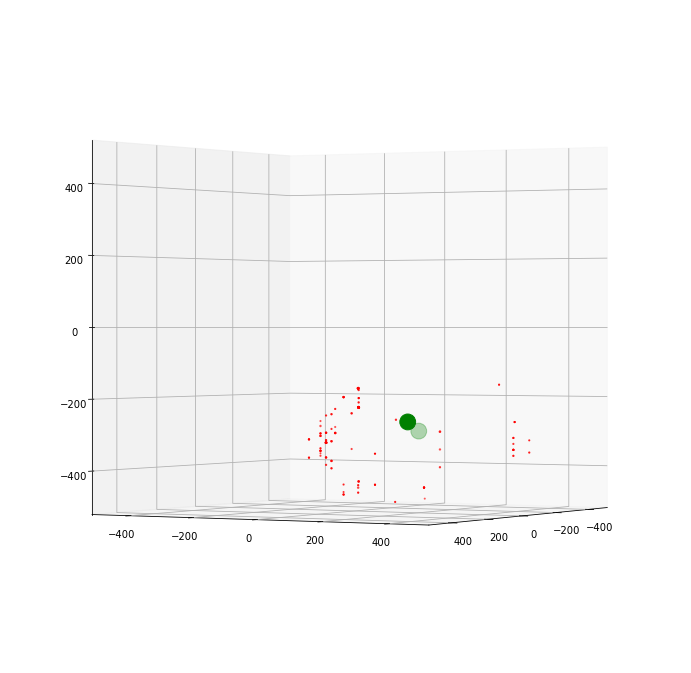

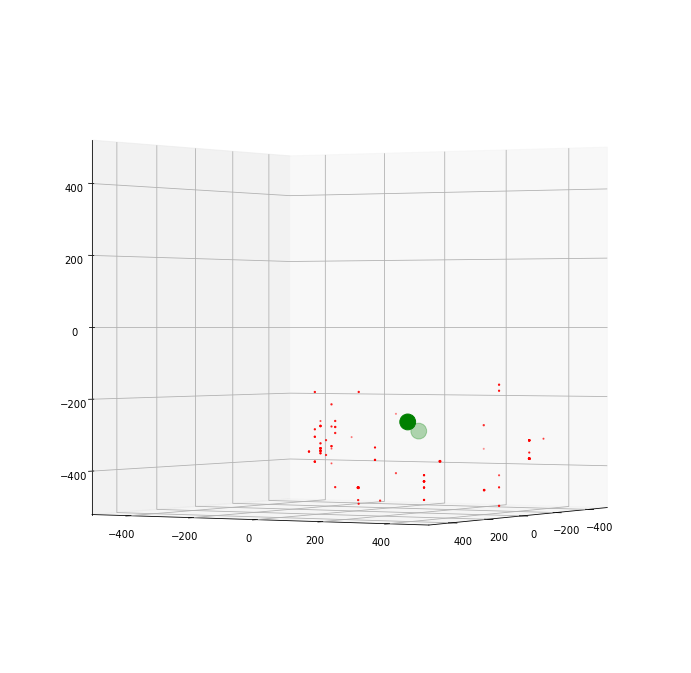

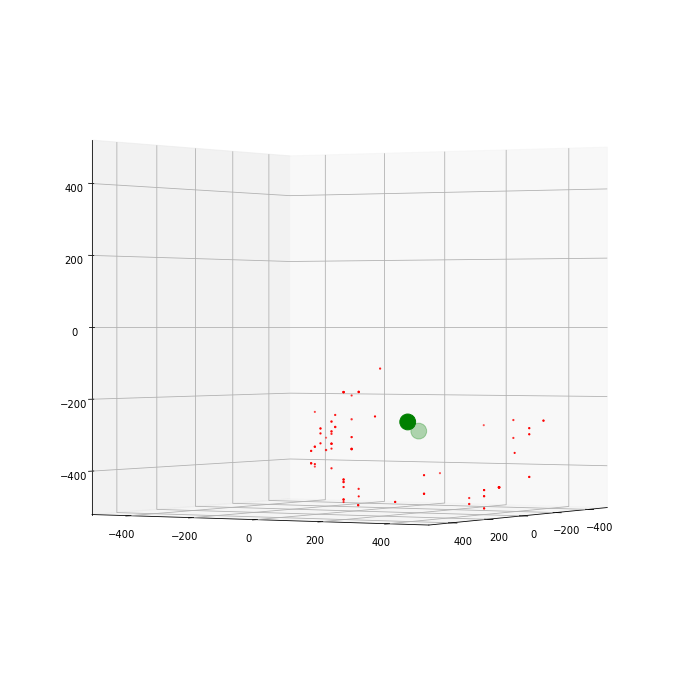

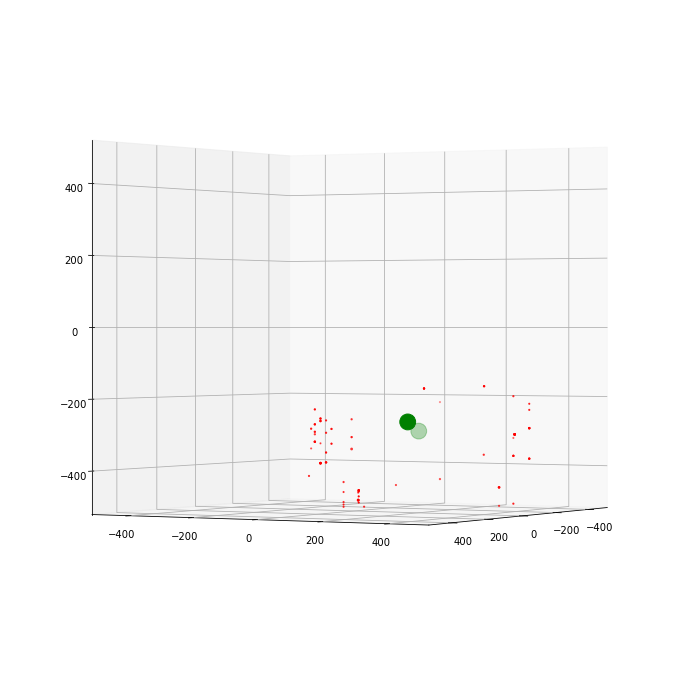

In [59]:
make_movie(labels_57_GM_W,GM_data_57,true_bangs[57], persistent = False)